# An analysis of the 2019 Kaggle ML and DS Survey for Women's Representation in Machine Learning and Data Science 
![](https://cdn-images-1.medium.com/max/1200/1*y3MlG_KVC3maok_WroUf9w.jpeg)
*Pic Credits:rawpixel.com / Freepik*



> ### *Women in tech didn't matter to people until tech started mattering to people: Rachel Sklar*

In the last few years, a lot of effort has being made in society to increase women's representation in the tech world. The idea behind these efforts is that attracting and retaining more women in science, technology, engineering, and mathematics (STEM) will ultimately enhance innovation and creativity. When women are not involved in these fields, experiences, needs, and desires that are unique to women may be overlooked.

It is not that there aren't any female role models out there to inspire us.
Do you remember the iconic photograph of** Katie Bouman in 2019**, watching the black hole's first photograph as it was being reconstructed? Not only was it a breakthrough moment for the scientific community, but an equally proud one for all the women scientists all over the world. A historic moment not just for science, but for women in science, too.

![](https://inteng-storage.s3.amazonaws.com/images/sizes/katieboumanfacebookmain_resize_md.jpg)

Similarly, women have also been making significant contributions to the fields of Machine Learning and Data Science. Be it **Margaret Hamilton** or **Grace Hopper** in the past or** Corinna Cortes** and **Fei Fei Li** today; women have made their presence felt with their work. More and more girls are being motivated to take up science and research in school and colleges. A lot of companies today are coming forward to change the world of work. This year, even the United Nations celebrated International Women's Day under the official theme **#BalanceforBetter**, advocating a more gender-balanced world.

However, as it may seem, not everything is still so "gung-ho" when it comes to women's representation is the Data Science field. The ratios are still skewed, and women still occupy far fewer leadership roles than men. But let's not just assume things but rather use data to verify our assumptions, and the 2019 Kaggle ML & DS survey is an excellent place to start. Let the numbers speak for themselves.

## Objective
The objective of this notebook to analyze the survey data to answer an important question: is the women participation in STEM really improving, or is it just a hype? Let's use our analysis skills to investigate whether things seem to be actually improving or is still much left to be done.

## The Annual Kaggle survey
Kaggle's annual Machine Learning and Data Science Survey is in its third year now. This year, as in [2017](https://www.kaggle.com/kaggle/kaggle-survey-2017) and [2018](https://www.kaggle.com/kaggle/kaggle-survey-2018/), Kaggle has conducted an industry-wide survey that presents a comprehensive view of the state of data science and machine learning. The Survey Challenges from 2017 and 2018 were very informative, and so is expected out of the 2019 survey too.

## Methodology
This notebook will only focus on the women in ML and DS, thereby analyzing the answers of the female respondents solely. The analysis will be two-fold:

* Analysis of the 2019 Kaggle DS & ML survey for Female respondents.
* Comparisons of the results in the 2019 study with the previous two surveys. This will present a better picture and show whether are things are improving for real or not.

In this notebook, we shall analyze the female participation in the survey under six different categories, namely:

![](https://imgur.com/6thMxvI.png)

Analyzing data under these different categories should give us a fair idea of the nature of women's representation is the ML and DS realm.

In [1]:
!pip install pycountry

/bin/sh: 1: pip: not found


In [2]:
# import the necessary libraries
import numpy as np 
import pandas as pd 

# Visualisation libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
from plotly.offline import init_notebook_mode, iplot 
import plotly.graph_objs as go
import plotly.offline as py
import pycountry
py.init_notebook_mode(connected=True)
import folium 
from folium import plugins

# Graphics in retina format 
%config InlineBackend.figure_format = 'retina' 

# Increase the default plot size and set the color scheme
plt.rcParams['figure.figsize'] = 8, 5
#plt.rcParams['image.cmap'] = 'viridis'


try:
  import google.colab
  data_file_prefix = "https://raw.githubusercontent.com/slankas/VisualizationCode/master/kaggle/"
  import plotly.io as pio
  pio.renderers.default = 'colab'
except:
  data_file_prefix = ""

# palette of colors to be used for plots
colors = ["steelblue","dodgerblue","lightskyblue","powderblue","cyan","deepskyblue","cyan","darkturquoise","paleturquoise","turquoise"]


# Disable warnings in Anaconda
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Importing the 2017,2018 and 2019 survey dataset

#Importing the 2019 Dataset
df_2019 = pd.read_csv(data_file_prefix + 'data/2019Survey/multiple_choice_responses.csv')
df_2019.columns = df_2019.iloc[0]
df_2019=df_2019.drop([0])

#Importing the 2018 Dataset
df_2018 = pd.read_csv(data_file_prefix + 'data/2018Survey/multipleChoiceResponses.csv')
df_2018.columns = df_2018.iloc[0]
df_2018=df_2018.drop([0])

#Importing the 2017 Dataset
df_2017=pd.read_csv(data_file_prefix + 'data/2017Survey/multipleChoiceResponses.csv',encoding='ISO-8859-1')


# Helper functions

def return_count(data,question_part):
    """Counts occurences of each value in a given column"""
    counts_df = data[question_part].value_counts().to_frame()
    return counts_df

def return_percentage(data,question_part):
    """Calculates percent of each value in a given column"""
    total = data[question_part].count()
    counts_df= data[question_part].value_counts().to_frame()
    percentage_df = (counts_df*100)/total
    return percentage_df


    
def plot_graph(data,question,title,x_axis_title,y_axis_title):
    """ plots a percentage bar graph"""
    df = return_percentage(data,question)
    
    trace1 = go.Bar(
                    x = df.index,
                    y = df[question],
                    #orientation='h',
                    marker = dict(color='dodgerblue',
                                 line=dict(color='black',width=1)),
                    text = df.index)
    data = [trace1]
    layout = go.Layout(barmode = "group",title=title,width=800, height=500,
                       xaxis=dict(type='category',categoryorder='array',categoryarray=salary_order,title=y_axis_title),
                       yaxis= dict(title=x_axis_title))
                       
    fig = go.Figure(data = data, layout = layout)
    iplot(fig)    

# <a>The State of Affairs Today - 2019</a> 
## <a> Top 10 Countries with the majority of respondents</a> 
Let's begin by analyzing the 2019 survey's dataset to get a big picture. We shall begin by importing the dataset and the necessary libraries for the analysis.



In [4]:

# Replacing the ambigious countries name with Standard names
df_2019['In which country do you currently reside?'].replace(
                                                   {'United States of America':'United States',
                                                    'Viet Nam':'Vietnam',
                                                    "People 's Republic of China":'China',
                                                    "United Kingdom of Great Britain and Northern Ireland":'United Kingdom',
                                                    "Hong Kong (S.A.R.)":"Hong Kong"},inplace=True)


df_2018['In which country do you currently reside?'].replace(
                                                   {'United States of America':'United States',
                                                    'Viet Nam':'Vietnam',
                                                    "People 's Republic of China":'China',
                                                    "United Kingdom of Great Britain and Northern Ireland":'United Kingdom',
                                                    "Hong Kong (S.A.R.)":"Hong Kong"},inplace=True)


# Splitting all the datasets genderwise
male_2019 = df_2019[df_2019['What is your gender? - Selected Choice']=='Male']
female_2019 = df_2019[df_2019['What is your gender? - Selected Choice']=='Female']

male_2018 = df_2018[df_2018['What is your gender? - Selected Choice']=='Male']
female_2018 = df_2018[df_2018['What is your gender? - Selected Choice']=='Female']

male_2017 = df_2017[df_2017['GenderSelect']=='Male']
female_2017 = df_2017[df_2017['GenderSelect']=='Female']


# Top-10 Countries with Respondents in 2019
topn = 10
count_male = male_2019['In which country do you currently reside?'].value_counts()[:topn].reset_index()
count_female = female_2019['In which country do you currently reside?'].value_counts()[:topn].reset_index()

pie_men = go.Pie(labels=count_male['index'],values=count_male['In which country do you currently reside?'],name="Men",hole=0.4,domain={'x': [0,0.46]})
pie_women = go.Pie(labels=count_female['index'],values=count_female['In which country do you currently reside?'],name="Women",hole=0.5,domain={'x': [0.52,1]})

layout = dict(title = 'Top-10 Countries with Respondents in 2019', font=dict(size=10), legend=dict(orientation="h"),
              annotations = [dict(x=0.2, y=0.5, text='Men', showarrow=False, font=dict(size=20)),
                             dict(x=0.8, y=0.5, text='Women', showarrow=False, font=dict(size=20)) ])

fig = dict(data=[pie_men, pie_women], layout=layout)
py.iplot(fig)

> ** 📌 Points to note :** 
> * The majority of the respondents(both male and female) are from India followed closely by the U.S. In fact, these countries together make up more than 50% of the entire population.
> * If a country or territory received less than 50 respondents,[they have been grouped into a group named "Other"](https://www.kaggle.com/c/kaggle-survey-2019/data) for anonymity.


## <a id="1">Comparison of number of respondents w.r.t the previous surveys</a>

In [5]:
df_all_surveys = pd.DataFrame(data = [len(df_2017),len(df_2018),len(df_2019)],
                          columns = ['Number of responses'], index = ['2017','2018','2019'])
df_all_surveys.index.names = ['Year of Survey']


x = df_all_surveys['Number of responses'].index
y = df_all_surveys['Number of responses'].values


# Use textposition='auto' for direct text
fig = go.Figure(data=[go.Bar(
            x=['Year 2017','Year 2018','Year 2019'],
            y=y,
            text=y,
            width=0.4,
            textposition='auto',
            marker=dict(color='dodgerblue')
 )])

fig.data[0].marker.line.width = 1
fig.data[0].marker.line.color = "black"
fig.update_layout(yaxis=dict(title='Number of Respondents'),width=700,height=500,
                  title='Total number of respondents over the years',
                  xaxis=dict(title='Years'))
fig.show()


> **📌 Points to note :**
> * Whereas the number of responses in 2018 was considerably higher than in 2017, the year 2019 has seen a decline. The people need to be sensitized about the importance of surveys. The data obtained from surveys like these can help to understand the Data Science Scenario around the world better.
> * To encourage more people to take part and hence, complete surveys, specific innovative steps can be taken. People usually do not like lengthy surveys, especially which expects them to write detailed answers.

Let's now focus our analysis on the six key areas of Gender, Country, Age, Education, Professional Experience and Salary.

# <a>1. Gender</a>
![](https://cdn-images-1.medium.com/max/800/1*LUQEhTYkzHRxwaRir6eZBg.png)
*Photo Credits : [rudall30](https://www.vectorstock.com/royalty-free-vectors/vectors-by_rudall30)*
> Barack Obama once said that where women are full participants in a country's politics or economy, societies are more likely to succeed. This is indeed true. Let's see if the same is affirmed by the data.

## <a>1.1 The Great Gender Divide</a>
The following plot analyses the gender distribution in the 2019 survey.

In [6]:
colors1 = ['dodgerblue', 'plum', '#F0A30A','#8c564b'] 
counts = df_2019['What is your gender? - Selected Choice'].value_counts(sort=True)
labels = counts.index
values = counts.values

pie = go.Pie(labels=labels, values=values, marker=dict(colors=colors1,line=dict(color='#000000', width=1)))
layout = go.Layout(title='Gender Distribution in 2019')

fig = go.Figure(data=[pie], layout=layout)
py.iplot(fig)

> **📌 Key Points :**
* There is a staggering difference between men and women respondents in the survey. Around 82% of the respondents are men while only 16% are women.
* Clearly, the above results indicate that the gender imbalance that affects the tech sector extends to data science and AI, as well.

## <a>1.2 Gender Distribution over the years</a>
Let's see how gender distribution varies for the previous two surveys.

In [7]:
from plotly.subplots import make_subplots
colors2 = ['dodgerblue', 'plum', '#F0A30A','#8c564b'] 
gender_count_2019 = df_2019['What is your gender? - Selected Choice'].value_counts(sort=True)
gender_count_2018 = df_2018['What is your gender? - Selected Choice'].value_counts(sort=True)
gender_count_2017 = df_2017['GenderSelect'].value_counts(sort=True)


labels = ["Male ", "Female", "Prefer not to say ", "Prefer to self-describe"]
labels1 = ["Male ", "Female","A different identity", "Non-binary","genderqueer, or gender non-conforming"]
# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=3, specs=[[{'type':'domain'}, {'type':'domain'},{'type':'domain'}]])
fig.add_trace(go.Pie(labels=labels1, values=gender_count_2017.values, name="2017",marker=dict(colors=colors2)),
              1, 1)
fig.add_trace(go.Pie(labels=labels, values=gender_count_2018.values, name="2018",marker=dict(colors=colors2)),
              1, 2)
fig.add_trace(go.Pie(labels=labels, values=gender_count_2019.values, name="2019",marker=dict(colors=colors2)),
              1, 3)
# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.5, hoverinfo="label+percent+name")

fig.data[0].marker.line.width = 1
fig.data[0].marker.line.color = "black"
fig.data[1].marker.line.width = 1
fig.data[1].marker.line.color = "black"
fig.data[2].marker.line.width = 1
fig.data[2].marker.line.color = "black"

fig.update_layout(
    title_text="Gender Distribution over the years",font=dict(size=12), legend=dict(orientation="h"),
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='2017', x=0.11, y=0.5, font_size=20, showarrow=False),
                 dict(text='2018', x=0.5, y=0.5, font_size=20, showarrow=False),
                 dict(text='2019', x=0.88, y=0.5, font_size=20, showarrow=False)])
fig.show()


> **📌 Points to note :**
> * Well, the pattern almost remains the same. Women respondents have been consistently low over the years. With this low participation, it gets really for our ideas and suggestions to be incorporated in the industry. 
**Common girls!! we need more participation**
> * The challenge of getting and keeping women in tech and data science goes well beyond educational exposure and will require some concrete steps from the establishments. Gender shouldn't limit accomplishments and opportunities for anyone.

# <a>2. Country</a> 

![](https://cdn-images-1.medium.com/max/800/1*uSZaRCMXVIYjNpxY58Y-wg.png)
*PC: [Freepic.com](www.freepik.com)*
## <a>2.1 Indian & U.S women lead the way</a>
Let us now look at the countries from where the female respondents come.The data will help us know the countries of maximum as well as minimum responses.

In [8]:
def get_name(code):
    '''
    Translate code to name of the country
    '''
    try:
        name = pycountry.countries.get(alpha_3=code).name
    except:
        name=code
    return name

country_number = pd.DataFrame(female_2019['In which country do you currently reside?'].value_counts())
country_number['country'] = country_number.index
country_number.columns = ['number', 'country']
country_number.reset_index().drop(columns=['index'], inplace=True)
country_number['country'] = country_number['country'].apply(lambda c: get_name(c))
country_number.head(5)



worldmap = [dict(type = 'choropleth', locations = country_number['country'], locationmode = 'country names',
                 z = country_number['number'], colorscale = "Blues", reversescale = True, 
                 marker = dict(line = dict( width = 0.5)), 
                 colorbar = dict(autotick = False, title = 'Number of respondents'))]

layout = dict(title = 'The Nationality of Female Respondents in 2019', geo = dict(showframe = False, showcoastlines = True, 
                                                                projection = dict(type = 'Mercator')))

fig = dict(data=worldmap, layout=layout)
py.iplot(fig, validate=False)

> **📌 Points to note :**
> * The majority of the female respondents are from India and U.S. 
> * The percentage of participation from Central Africa is rather appalling, although countries like Nigeria show their presence on the world map.

## <a>2.2 Top 20 Countries of Female Respondents</a>
Let us now dive further into the data to determine the top twenty countries of the female respondents. Let's see which countries made the cut.

In [9]:


def plot_graph(data,question,title,x_axis_title):
    df = return_percentage(data,question)
    
    trace1 = go.Bar(
                    y = df.index,
                    x = df[question][0:20],
                    orientation='h',
                    marker = dict(color='dodgerblue',line=dict(color='black',width=1)),
                    text = df.index)
    data = [trace1]
    layout = go.Layout(barmode = "group",title=title,width=800, height=500, 
                       xaxis= dict(title=x_axis_title),
                       yaxis=dict(autorange="reversed"),
                       showlegend=False)
    fig = go.Figure(data = data, layout = layout)
    fig.show()
     
response_count = female_2019['In which country do you currently reside?'].count()
plot_graph(female_2019,'In which country do you currently reside?','Top 20 countries of female respondents','Percentage of Female Respondents')
    

> **📌 Points to note :**
* Maximum female respondents are from India followed by U.S. This pattern has been observed in the overall population also. 
* It is heartening to see that few females from Turkey, Nigeria, and Pakistan have also responded to the survey, albeit their percentage is very small.

## <a>2.3 The Indian & the U.S Female Respondents over the years<a/>
Since India and U.S have the maximum percentage of respondents, let's analyse and find out if the scenario was the same in the last two years also.

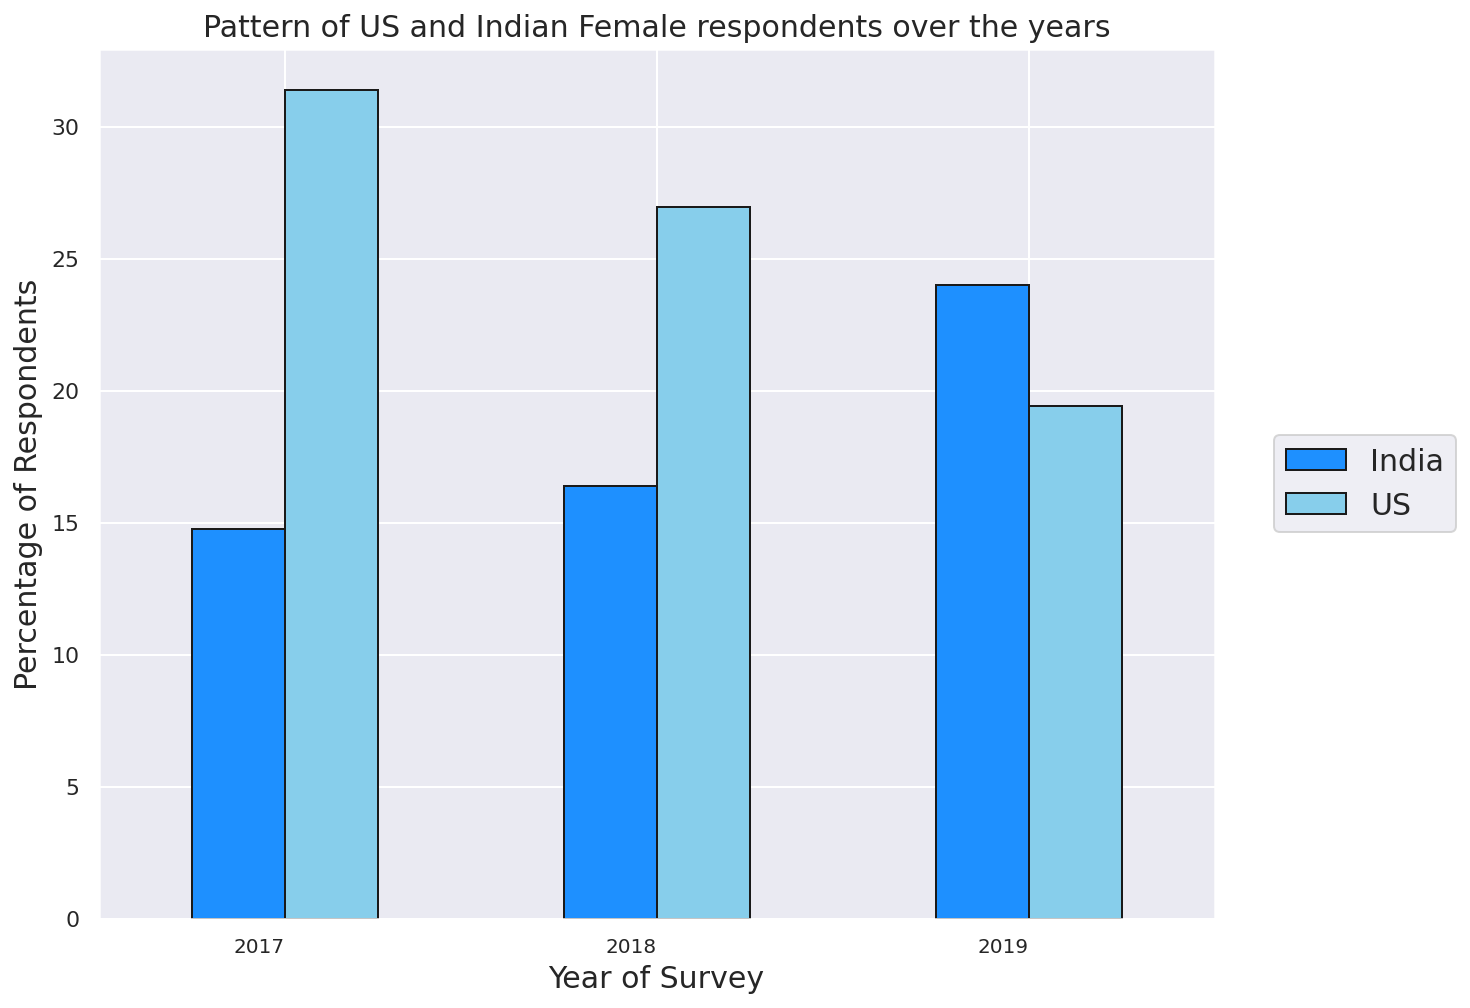

In [10]:

female_country_2019 = female_2019['In which country do you currently reside?']
female_country_2018 = female_2018['In which country do you currently reside?']
female_country_2017 = female_2017['Country']
                                                                  
f_2019 = female_country_2019[(female_country_2019 == 'India') | (female_country_2019 == 'United States')].value_counts()
f_2018 = female_country_2018[(female_country_2018 == 'India') | (female_country_2018 == 'United States')].value_counts()
f_2017 = female_country_2017[(female_country_2017 == 'India') | (female_country_2017 == 'United States')].value_counts()                                                                  
                                         
female_country_count = pd.DataFrame(data = [f_2017,f_2018,f_2019],index = ['2017','2018','2019'])    

female_country_count['total'] = [len(female_2017),len(female_2018),len(female_2019)]
female_country_count['US%'] = female_country_count['United States']/female_country_count['total']*100
female_country_count['India%'] = female_country_count['India']/female_country_count['total']*100

female_country_count[['India%','US%']].plot(kind='bar',color=['dodgerblue','skyblue'],linewidth=1,edgecolor='k')
plt.gcf().set_size_inches(10,8)
plt.title('Pattern of US and Indian Female respondents over the years', fontsize = 15)
plt.xticks(rotation=0,fontsize='10', horizontalalignment='right')
plt.xlabel('Year of Survey',fontsize=15)
plt.ylabel('Percentage of Respondents',fontsize=15)
plt.legend(fontsize=15,bbox_to_anchor=(1.04,0.5), loc="center left",labels=['India','US'])
plt.show()


> ** 📌 Points to note :**
* The number of female respondents in the U.S was considerably higher than in India for the years 2017 and 2018. However, the year 2019 saw a growth in Indian female respondents and their percentage outpaced the U.S females.
* This is a good sign for India as a country since the percentage of participation was more than last year. On the underhand, steps could be taken to analyze why the participation of U.S women declined, who were leading from the past two years.

## <a>2.4 Daunting obstacles remain in Africa</a>
As we saw in section 2,1, Africa needs special attention. Let's look at the participants from the African subcontinent.

In [11]:

African_2019 = female_country_2019[(female_country_2019 == 'Algeria') | 
                                   (female_country_2019 == 'Nigeria') |
                                   (female_country_2019 == 'Egypt')   |
                                   (female_country_2019 == 'Kenya')   |
                                   (female_country_2019 == 'South Africa')].value_counts()

African_2018 = female_country_2018[(female_country_2018 == 'Algeria') | 
                                   (female_country_2018 == 'Nigeria') |
                                   (female_country_2018 == 'Egypt')   |
                                   (female_country_2018 == 'Kenya')   |
                                   (female_country_2018 == 'South Africa')].value_counts()




African_2017 = female_country_2017[(female_country_2017 == 'Algeria') | 
                                   (female_country_2017 == 'Nigeria') |
                                   (female_country_2017 == 'Egypt')   |
                                   (female_country_2017 == 'Kenya')   |
                                   (female_country_2017 == 'South Africa')].value_counts()
African_subcontinent_count = pd.DataFrame(data = [African_2017,African_2018,African_2019],index = ['2017','2018','2019']) 


African_subcontinent_count.fillna(0,inplace=True)
African_subcontinent_count.loc[:,'Sum'] = African_subcontinent_count.sum(axis=1)


x = African_subcontinent_count['Sum'].index
y = African_subcontinent_count['Sum'].values

# Use textposition='auto' for direct text
fig1 = go.Figure(data=[go.Bar(
            x=['Year 2017','Year 2018','Year 2019'],
            y=y,
            text=y,
            width=0.4,
            textposition='auto',
            marker=dict(color='dodgerblue'))])

fig1.data[0].marker.line.width = 1
fig1.data[0].marker.line.color = "black"
fig1.update_layout(yaxis=dict(title='Number of Female Respondents'),
                   title='Total African Females respondents over the years',width=800,height=500,
                   xaxis=dict(title='Years'))
fig1.show()

> ** 📌 Points to note :**
* The number of African females who responded to the survey in 2019 has increased as compared to the previous years. Around 150 females responded to the survey in 2019 whereas, for the previous years, the numbers were even less than 100. However, there is a lot of progress to be still made.

## <a>2.5 Algerian females make an appearance<a/>
It will be also interesting to find out the reason for the increased participation from the African subcontinent.Let's dig in further for more details.

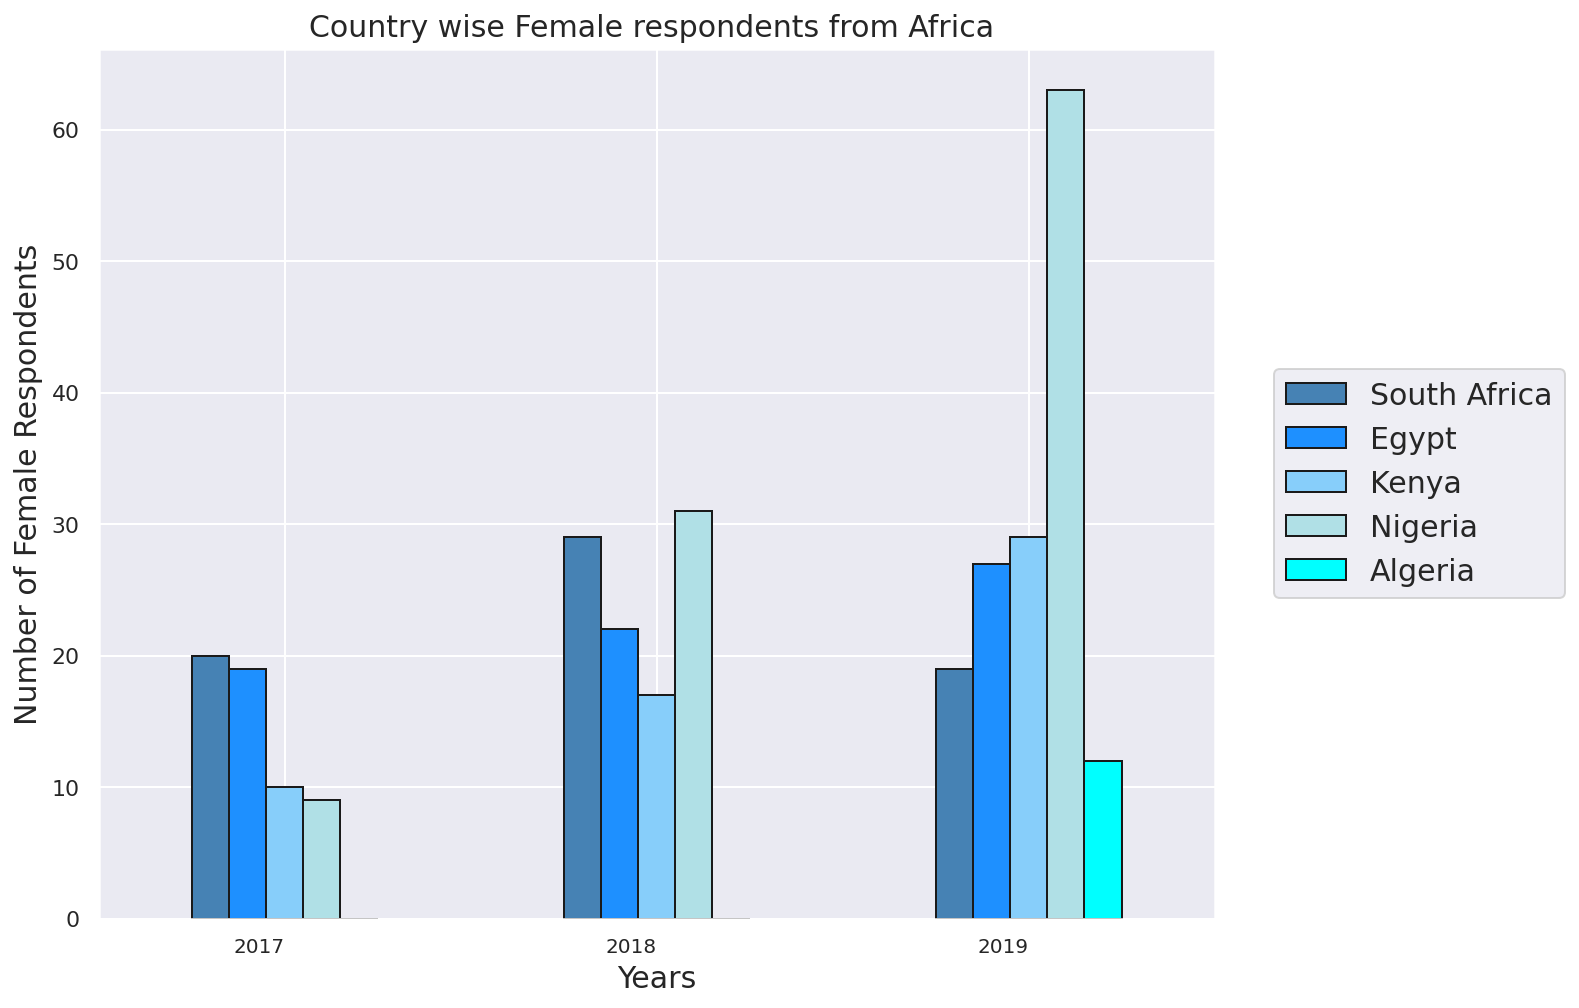

In [12]:
countries = ['South Africa','Egypt','Kenya','Nigeria','Algeria']

African_subcontinent_count[countries].plot(kind='bar',color=colors,linewidth=1,edgecolor='k')
plt.gcf().set_size_inches(10,8)
plt.title('Country wise Female respondents from Africa ', fontsize = 15)
plt.xticks(rotation=0,fontsize='10', horizontalalignment='right')
plt.xlabel('Years',fontsize=15)
plt.ylabel('Number of Female Respondents',fontsize=15)
plt.legend(fontsize=15,bbox_to_anchor=(1.04,0.5), loc="center left")
plt.show()

> ** 📌 Points to note :**
* Interestingly, female respondents from Algeria also took the survey for the first time in 2019.
* There has been a sharp spike in the Nigerian female respondents as compared to the previous two years.
* Both the above factors have contributed to the better performance of African females in the 2019 survey.

# <a>3. Age Distribution</a>
![](https://cdn-images-1.medium.com/max/800/1*hmOJeowjdAZudATFTHIoLw.png)    
*PC : www.freepik.com  *  
    
Age is an important attribute of any demographic analysis. It'll be interesting to see the age distribution of all the female respondents.
    
## <a>3.1 The Young Brigade dominates<a/>
Let's look at the age distribution of the female respondents in 2019.


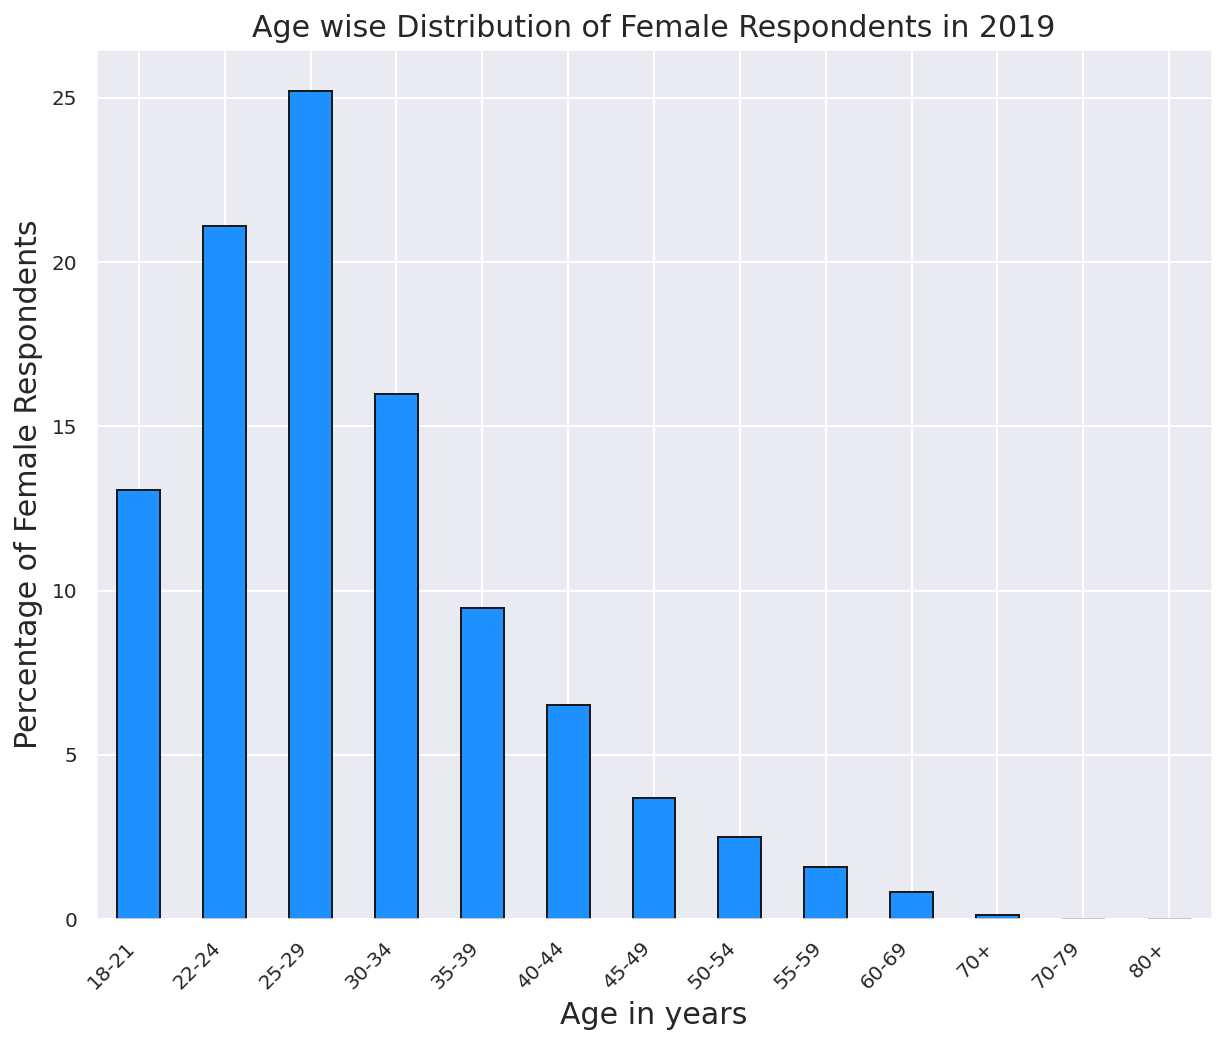

In [13]:

female_2017['Age in years'] = pd.cut(x=female_2017['Age'], bins=[18,21,25,29,34,39,44,49,54,59,69,79], 
                                                        labels=['18-21',
                                                                '22-24',
                                                                '25-29',
                                                                '30-34',
                                                                '35-39',
                                                                '40-44',
                                                                '45-49',
                                                                '50-54',
                                                                '55-59',
                                                                '60-69',
                                                                '70+'])
                                                                                                  


x = female_2017['Age in years'].value_counts()
y = female_2018['What is your age (# years)?'].value_counts()
z = female_2019['What is your age (# years)?'].value_counts()


w = pd.DataFrame(data = [x,y,z],index = ['2017','2018','2019'])
w.fillna(0,inplace=True)

w.loc['2017'] = w.loc['2017']/len(female_2017)*100
w.loc['2018'] = w.loc['2018']/len(female_2018)*100
w.loc['2019'] = w.loc['2019']/len(female_2019)*100

w.T[['2019']].plot(subplots=True, layout=(1,1),kind='bar',color='dodgerblue',linewidth=1,edgecolor='k',legend=False)
plt.gcf().set_size_inches(10,8)
plt.title('Age wise Distribution of Female Respondents in 2019',fontsize=15)
plt.xticks(rotation=45,fontsize='10', horizontalalignment='right')
plt.yticks( fontsize=10)
plt.xlabel('Age in years',fontsize=15)
plt.ylabel('Percentage of Female Respondents',fontsize=15)
plt.show()

> ** 📌 Points to note :**
* The majority of the female respondents are in the (25 -29) age group followed closely by (22–24) age group. Thus we can say that most of the women lie between the 20 to 30 age bracket. 
* The (20–30) age group can comprise of both students(undergraduate and postgraduate) and professionals. 
* Interestingly, females greater than 70 years of age have also responded. Well, as it is said - Age is only a number !!.

## <a>3.2 Age distribution pattern over the years<a/>
Was the age distribution pattern same for the last two years too? let's analyze and find out.   

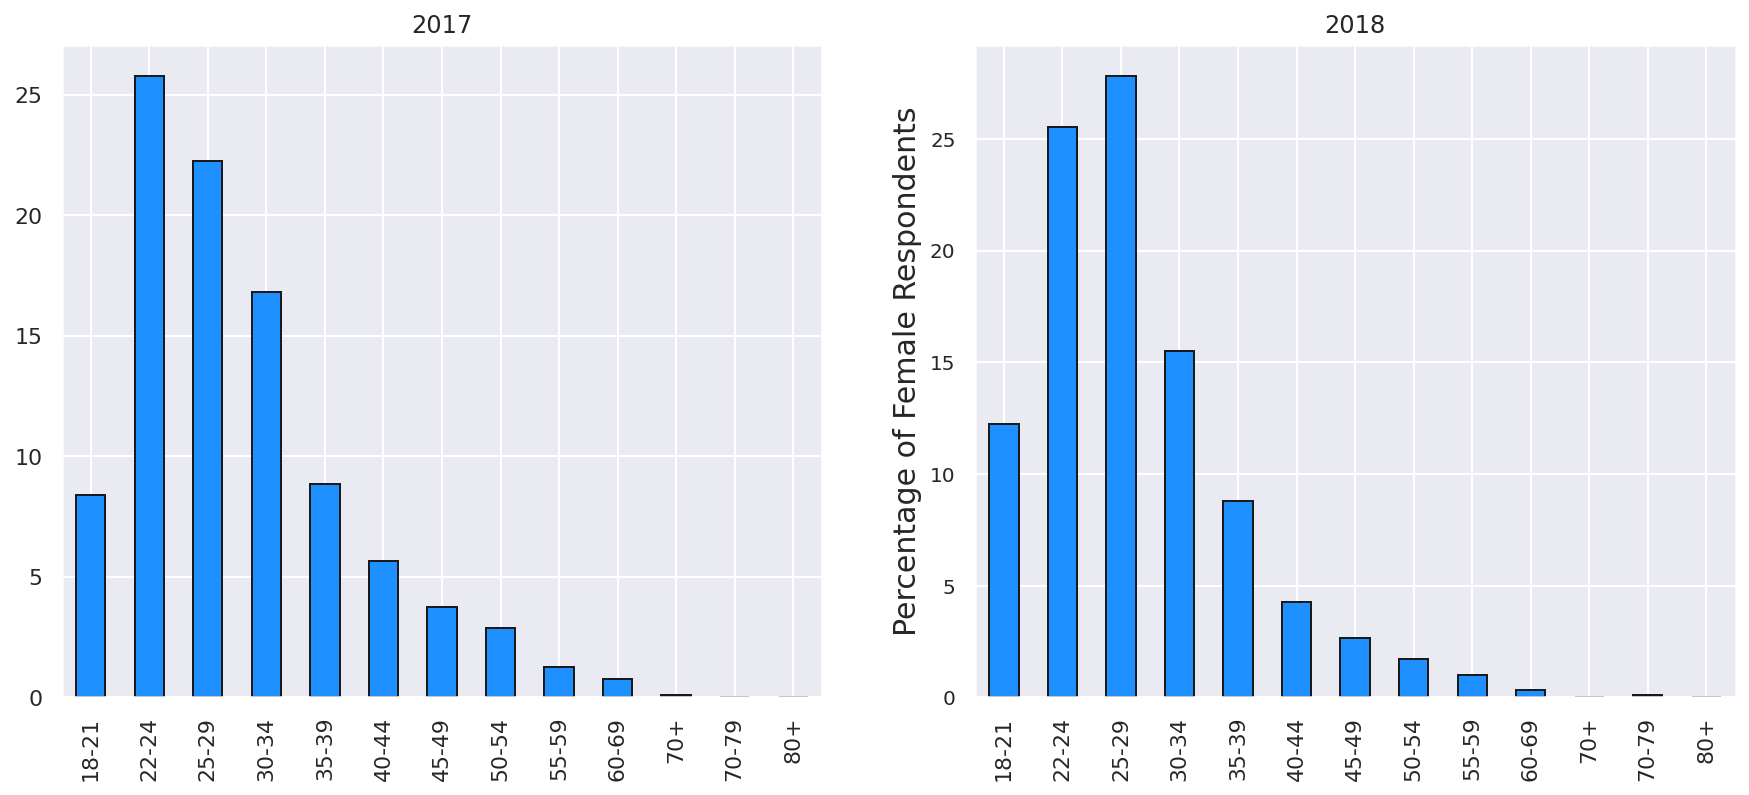

In [14]:
w.T[['2017','2018']].plot(subplots=True,layout=(1,2),color='dodgerblue',kind='bar',linewidth=1,edgecolor='k',legend=False)
plt.gcf().set_size_inches(15,6)
#plt.title('Age wise Distribution of Female Respondents in 2019',fontsize=15)
#plt.xticks(rotation=0,fontsize='10', horizontalalignment='right')
plt.yticks( fontsize=10)
#plt.xlabel('Age in years',fontsize=15)
plt.ylabel('Percentage of Female Respondents',fontsize=15)
plt.show()

> ** 📌 Points to note :**
* No notable change in the pattern in 2018 was observed.
* in 2017 however, there were more responses from the (22–24) age group as compared to other age brackets.
* Overall, the 20–30 group dominates.

 ## <a>3.3 Country wise Age distribution<a/>
We know that the young generation dominates the current Data Science landscape. Let's also see how are they distributed geographically.

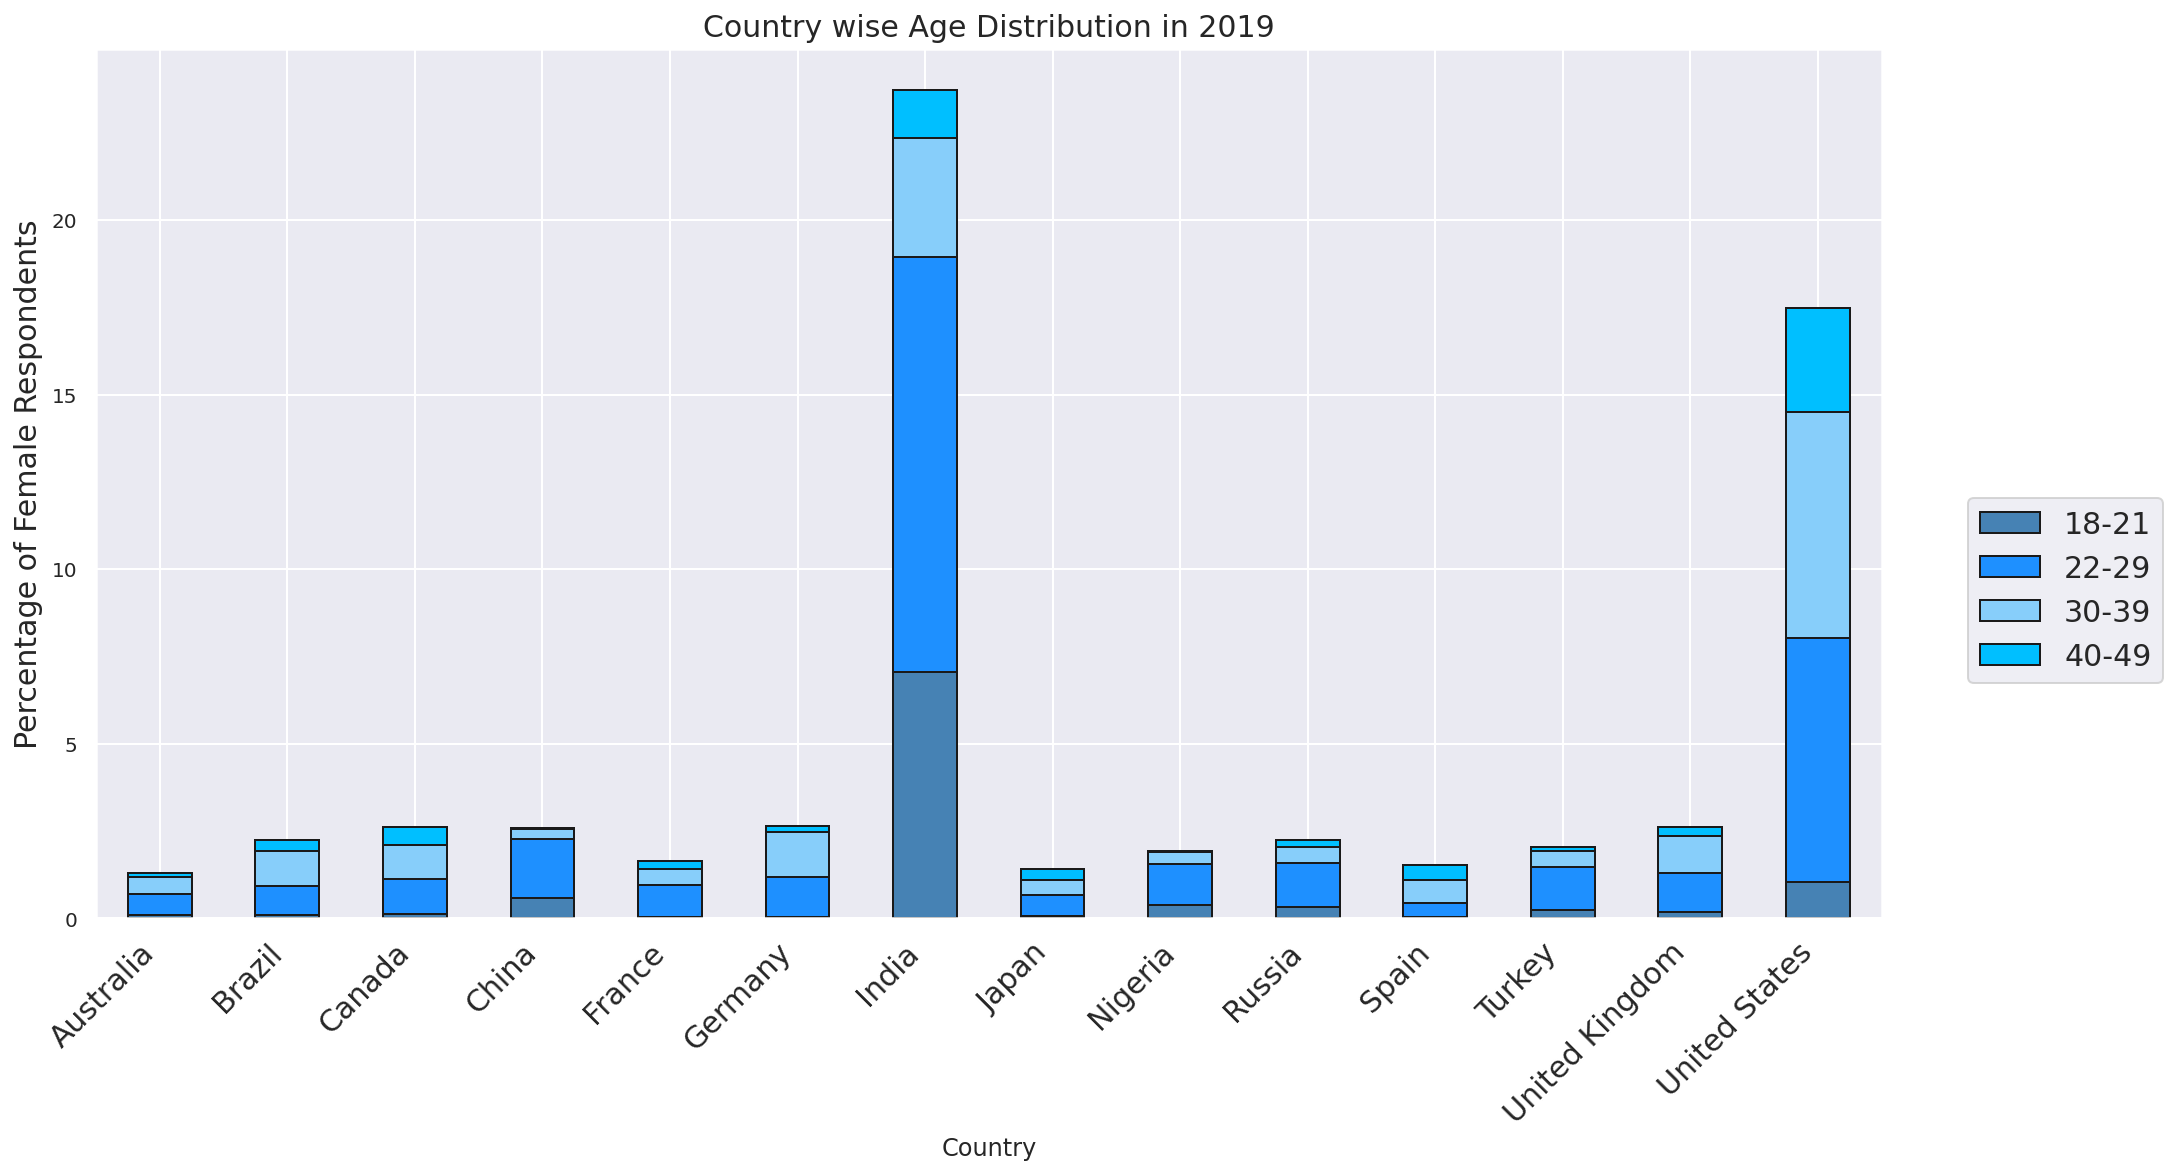

In [15]:
## Grouping the Ages


female_2019['Age Group']=np.where(female_2019['What is your age (# years)?'].isin(['18-21']),'18-21','')
female_2019['Age Group']=np.where(female_2019['What is your age (# years)?'].isin(['25-29','22-24']),'22-29',female_2019['Age Group'])
female_2019['Age Group']=np.where(female_2019['What is your age (# years)?'].isin(['30-34','35-39']),'30-39',female_2019['Age Group'])
female_2019['Age Group']=np.where(female_2019['What is your age (# years)?'].isin(['40-44','45-49']),'40-49',female_2019['Age Group'])
female_2019['Age Group']=np.where(female_2019['What is your age (# years)?'].isin(['50-54','55-59']),'50-59',female_2019['Age Group'])
female_2019['Age Group']=np.where(female_2019['What is your age (# years)?'].isin(['60-69']),'60-69',female_2019['Age Group'])
female_2019['Age Group']=np.where(female_2019['What is your age (# years)?'].isin(['70+']),'70s and above',female_2019['Age Group'])


colors = ["steelblue","dodgerblue","lightskyblue","deepskyblue","darkturquoise","paleturquoise","turquoise"]

count_age=female_2019.groupby(['In which country do you currently reside?','Age Group'])['What is your age (# years)?'].count().reset_index()
count_age.columns=['Country','Age Group','Count']
count_age=count_age[count_age['Country'].isin(female_2019['In which country do you currently reside?'].value_counts()[:15].index)]
count_age=count_age[count_age['Country']!='Other']

count_age['Percent'] = (count_age['Count']/len(female_2019))*100
count_age = count_age.sort_values('Percent',ascending=False)

df_age_country = count_age.pivot('Country','Age Group','Percent')
df_age_country.fillna('0',inplace=True)

df_age_country.plot.bar(stacked=True,color=colors,linewidth=1,edgecolor='k')
plt.gcf().set_size_inches(16,8)
plt.xticks( rotation=45,fontsize='15', horizontalalignment='right')
plt.yticks( fontsize=10)
plt.title('Country wise Age Distribution in 2019', fontsize = 15)
#plt.xlabel('Countries',fontsize=15)
plt.ylabel('Percentage of Female Respondents',fontsize=15)
plt.legend(fontsize=15,bbox_to_anchor=(1.04,0.5), loc="centre left")
plt.show()

> 📌 **Points to note :**
* The majority of female respondents in India comprise of women in their 20s, which is also higher than any other country. Thus Indian females predominantly comprise a younger talent pool.
* Also, there are a considerable number of women respondents in India, who are between 18 and 21 years.This age group comprises generally students and it good to see them participating in the survey.
* For the U.S women, the percentage of student respondents is comparatively less. The major chunk of the population is in the 22–29 and 30–39 age range.


# <a>4. Education</a>
![](https://cdn-images-1.medium.com/max/800/1*JEEn6yzozl_ye9-oEUIMxQ.png)
*PC: www.freepik.com*
    
It has been rightly said that educated females form the backbone of society. Let's see the qualification status of the female respondents in 2019.
## <a>4.1 Educational qualifications of the female respondents in 2019<a/>

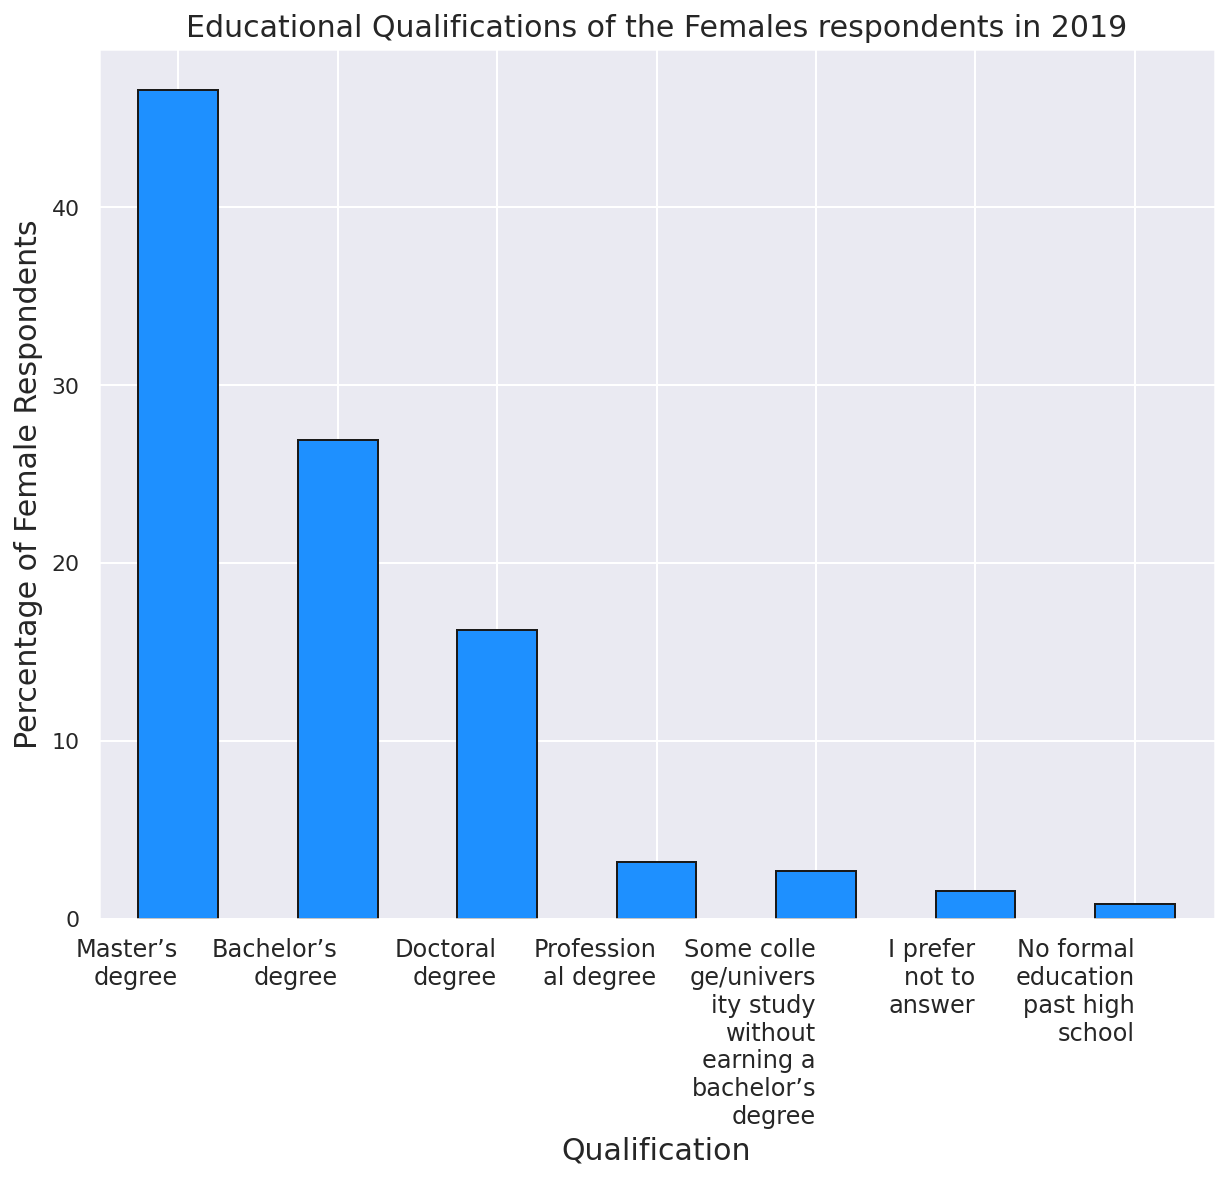

In [16]:
import textwrap
from  textwrap import fill

x_axis=range(7)
qualification = female_2019['What is the highest level of formal education that you have attained or plan to attain within the next 2 years?'].value_counts().to_frame()
qualification = qualification/len(female_2019)*100
labels = qualification.index

qualification.plot(kind='bar',color='dodgerblue',linewidth=1,edgecolor='k',legend=None)
plt.gcf().set_size_inches(10,8)
plt.title('Educational Qualifications of the Females respondents in 2019', fontsize = 15)
plt.xticks(x_axis, [textwrap.fill(label, 10) for label in labels], 
           rotation = 0, fontsize=12, horizontalalignment="right")
#plt.xlabel('Education Qualification',fontsize=15)
plt.ylabel('Percentage of Female Respondents',fontsize=15)
plt.xlabel('Qualification',fontsize=15)
plt.show()

> **📌 Points to note :**
* The education status of the females is impressive with the majority (~46%)having a Master's degree followed closely by a Bachelor's degree(27%). There are also 16% PhDs who answered the survey. 
* The analysis also reveals that there is a certain proportion who have had no formal education past high school. In spite of this, they took the survey which in itself is a commendable thing. They should be encouraged to complete their education either full time or through part-time courses.

## <a>4.2 Educational qualifications of the female respondents, country wise<a/>

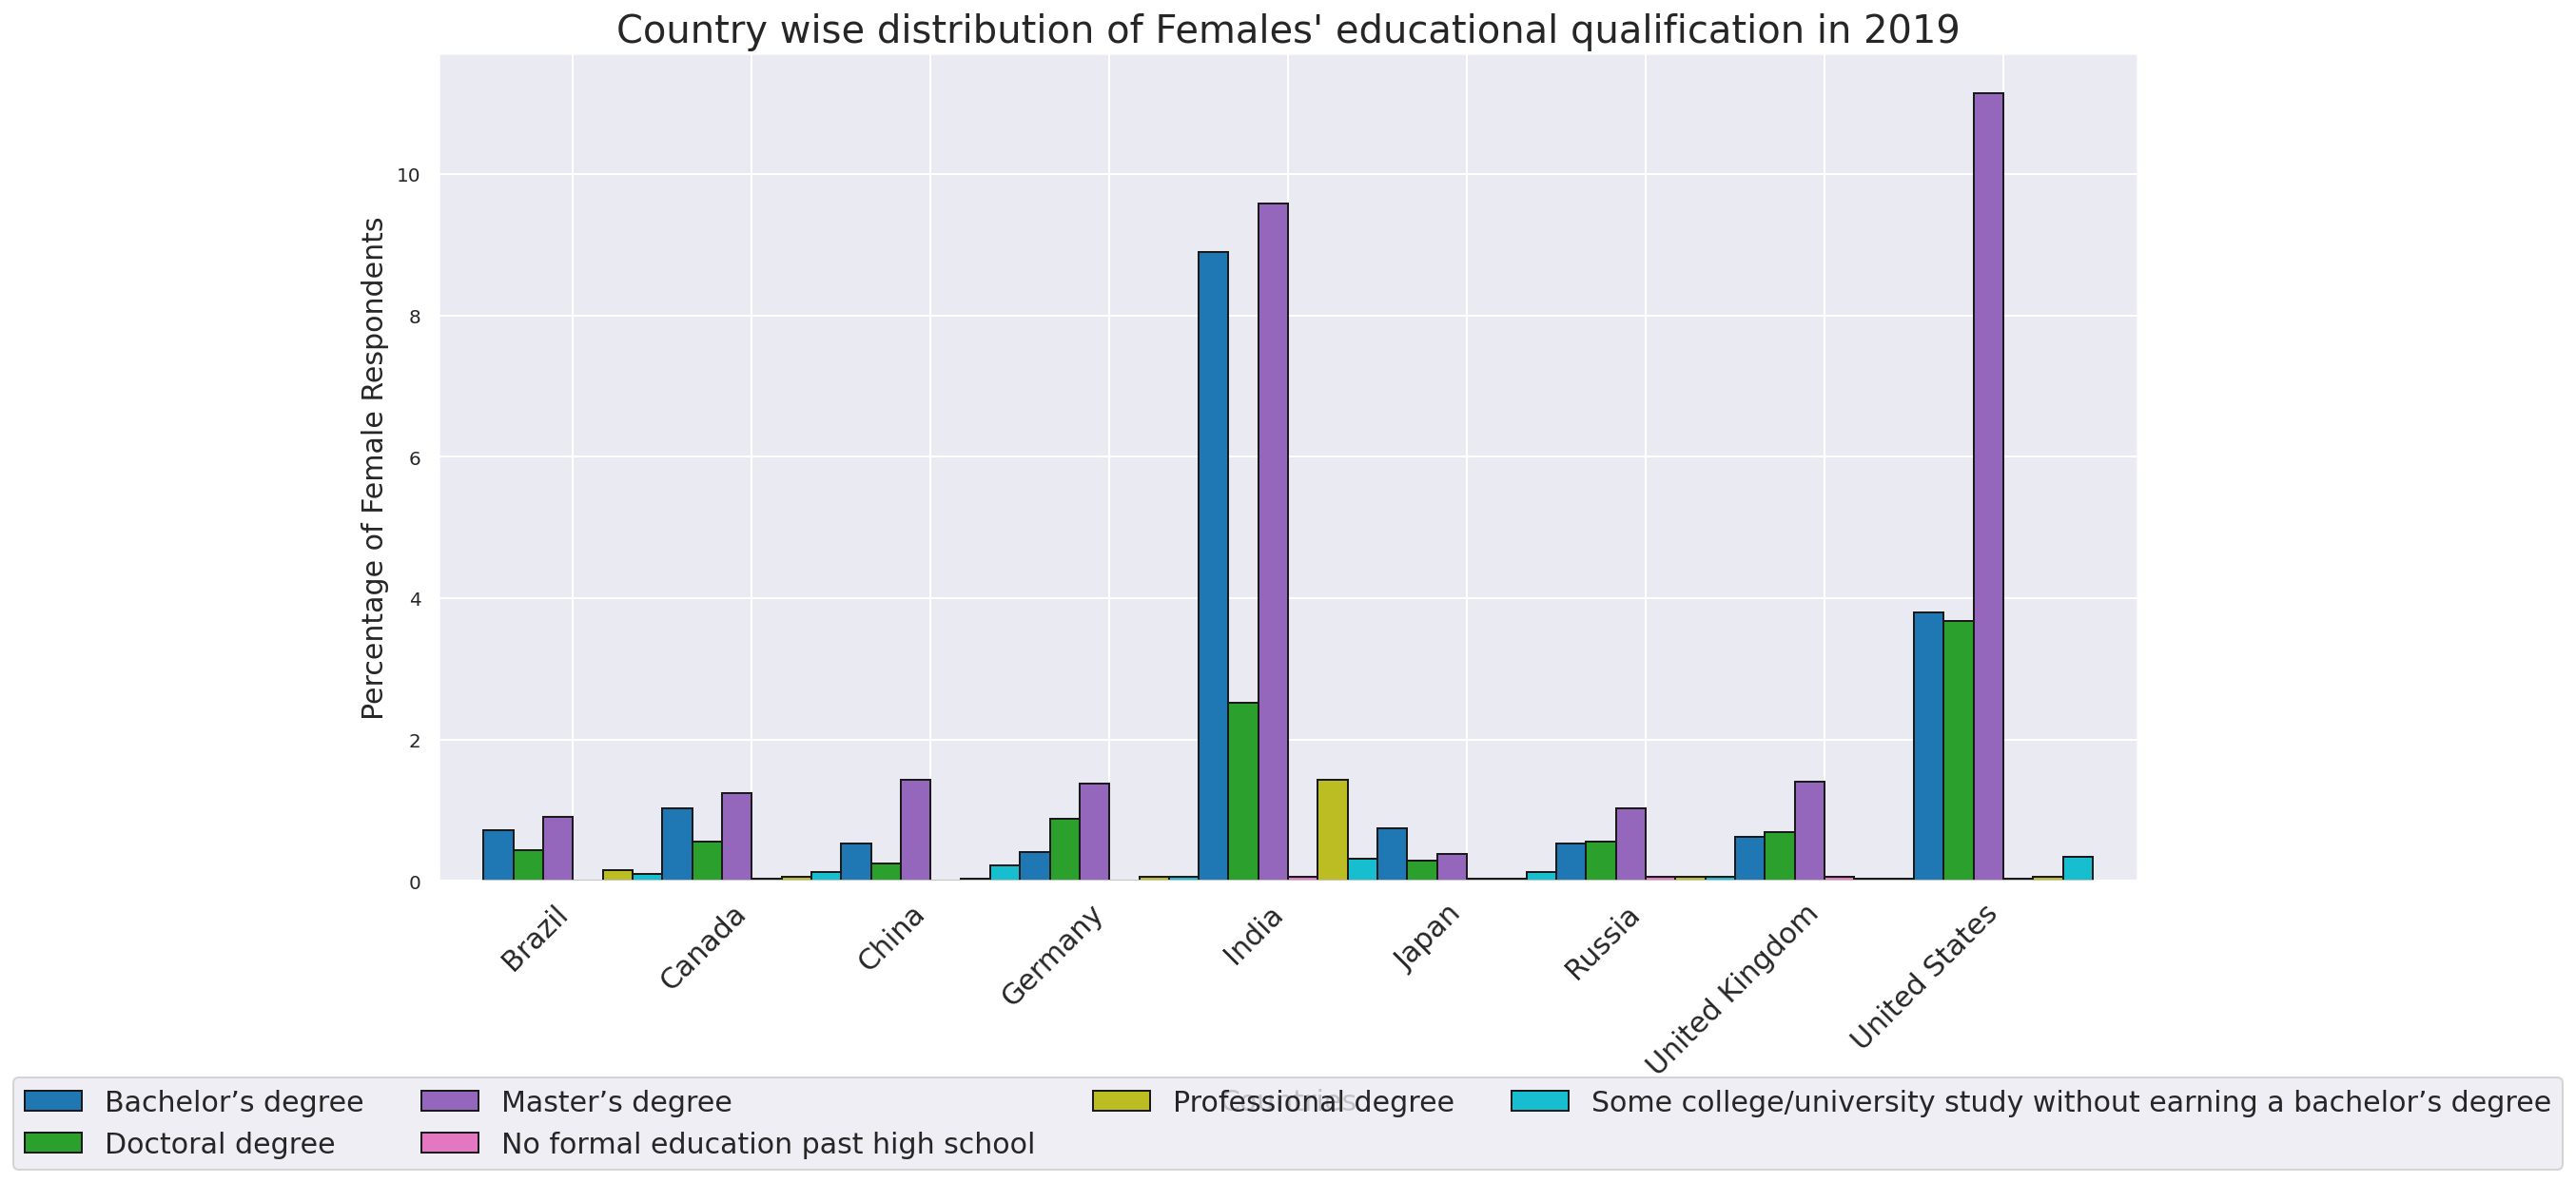

In [17]:
df_edu_temp = pd.crosstab(female_2019['In which country do you currently reside?'],
              female_2019['What is the highest level of formal education that you have attained or plan to attain within the next 2 years?'])


df_edu = df_edu_temp[(df_edu_temp.index == 'Brazil')| (df_edu_temp.index == 'India') | (df_edu_temp.index == 'Japan') | (df_edu_temp.index == 'Russia') | (df_edu_temp.index == 'United States')
                    |(df_edu_temp.index == 'Canada')| (df_edu_temp.index == 'Germany') | (df_edu_temp.index == "China")
                    |(df_edu_temp.index == 'United Kingdom')].drop('I prefer not to answer',axis=1)

df_edu = df_edu/len(female_2019)*100
df_edu.plot(kind='bar',width=1,cmap='tab10',linewidth=1,edgecolor='k')
plt.gcf().set_size_inches(16,8)
plt.title("Country wise distribution of Females' educational qualification in 2019", fontsize = 20)
plt.xlabel('Countries',fontsize=15)
plt.ylabel('Percentage of Female Respondents',fontsize=15)
plt.xticks( rotation=45,fontsize='15', horizontalalignment='right')
plt.yticks( fontsize=10)
plt.legend(fontsize=15,bbox_to_anchor=(0.5, -0.22), loc="upper center",ncol=4)
plt.show()

> **📌 Points to note :**
* The U.S has maximum number of women with a Master's and Doctoral degrees followed closely by India. However, It should be kept in mind that a lot of women in India and other countries, generally move to the U.S for their Masters and PhDs.
* India also tops the list with the maximum number of Bachelor degrees. This is pretty obvious since the majority of women respondents are students in their 20s.
* There is a general predominance of Master's over other degrees, among all the countries except for Japan which has a higher incidence of a Professional degree.

# <a>5. Professional Experience</a>
![](https://cdn-images-1.medium.com/max/800/1*Ncg-xZhA-ZOM9InqStVm6w.jpeg)
*PC: www.freepik.com *
    
We already know that most of the female respondents comprising mainly of a young population having mostly students. Let's now see the various professional roles that females occupy in the industry.


## <a>5.1 Female respondents' roles over the years<a/>

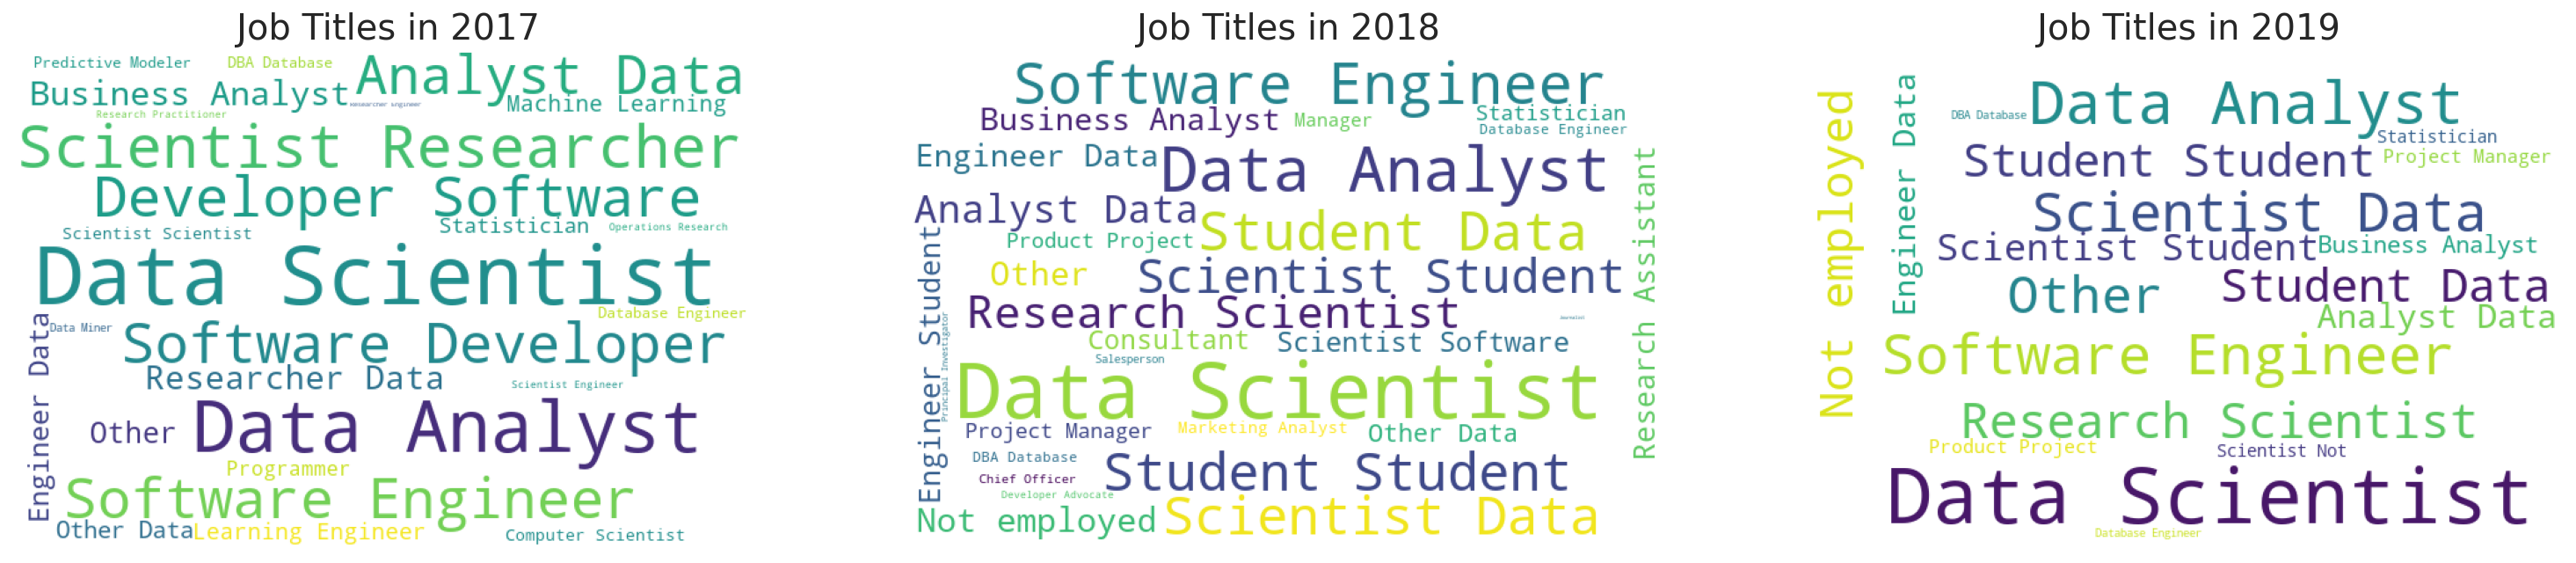

In [18]:
from wordcloud import WordCloud
female_title_2017 = female_2017['CurrentJobTitleSelect'].dropna()
female_title_2018 = female_2018['Select the title most similar to your current role (or most recent title if retired): - Selected Choice'].dropna()
female_title_2019 = female_2019['Select the title most similar to your current role (or most recent title if retired): - Selected Choice'].dropna()

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=[26, 8])
wordcloud1 = WordCloud( background_color='white',
                        width=600,
                        height=400).generate(" ".join(female_title_2017))
ax1.imshow(wordcloud1)
ax1.axis('off')
ax1.set_title('Job Titles in 2017',fontsize=20);

wordcloud2 = WordCloud( background_color='white',
                        width=600,
                        height=400).generate(" ".join(female_title_2018))
ax2.imshow(wordcloud2)
ax2.axis('off')
ax2.set_title('Job Titles in 2018',fontsize=20);

wordcloud3 = WordCloud( background_color='white',
                        width=600,
                        height=400).generate(" ".join(female_title_2019))
ax3.imshow(wordcloud3)
ax3.axis('off')
ax3.set_title('Job Titles in 2019',fontsize=20);

> **📌 Points to note :**
* Data Scientist seems to be the principal role for the female respondents since 2017 followed by a Data Analyst. Other roles like Developers, researchers, and project managers can also be seen in the population.

## <a>5.2 Top 20 roles for female respondents in 2019<a/>

In [19]:
def plot_graph(data,question,title,x_axis_title):
    df = return_percentage(data,question)
    
    trace1 = go.Bar(
                    y = df.index,
                    x = df[question][0:20],
                    orientation='h',
                    marker = dict(color='skyblue',
                                 line=dict(color='black',width=1)),
                    text = df.index)
    data = [trace1]
    layout = go.Layout(barmode = "group",title=title,width=800, height=500, 
                       xaxis= dict(title=x_axis_title),
                       yaxis=dict(autorange="reversed"),
                       showlegend=False)
    fig = go.Figure(data = data, layout = layout)
    iplot(fig)
    
#response_count = len(female_2019['Select the title most similar to your current role (or most recent title if retired): - Selected Choice'])
plot_graph(female_2019,'Select the title most similar to your current role (or most recent title if retired): - Selected Choice','Top 20 roles for female respondents in 2019','Percentage of Female Respondents')
    

> **📌 Points to note :**
* If we exclude students from the result, Data Scientists(~19.5%) form the chunk of the population who took the survey. This is closely followed by women in the Data Analyst role(~11%). 
* Interestingly, there are also women who are not employed but have responded to the survey. These women could not be working by choice or may be looking for jobs. We could connect to these women to understand if they are willing to work and could assist them in the same.

## <a>5.3 Female respondents' Current Roles country wise in 2019<a/>
Let's combine some of the roles to create broader groups. For instance, Data Engineer and DBA/Database Engineer can be clubbed together. Similarly, Data Analyst and Business Analyst can also be merged. Let's then see the distribution geographically.    

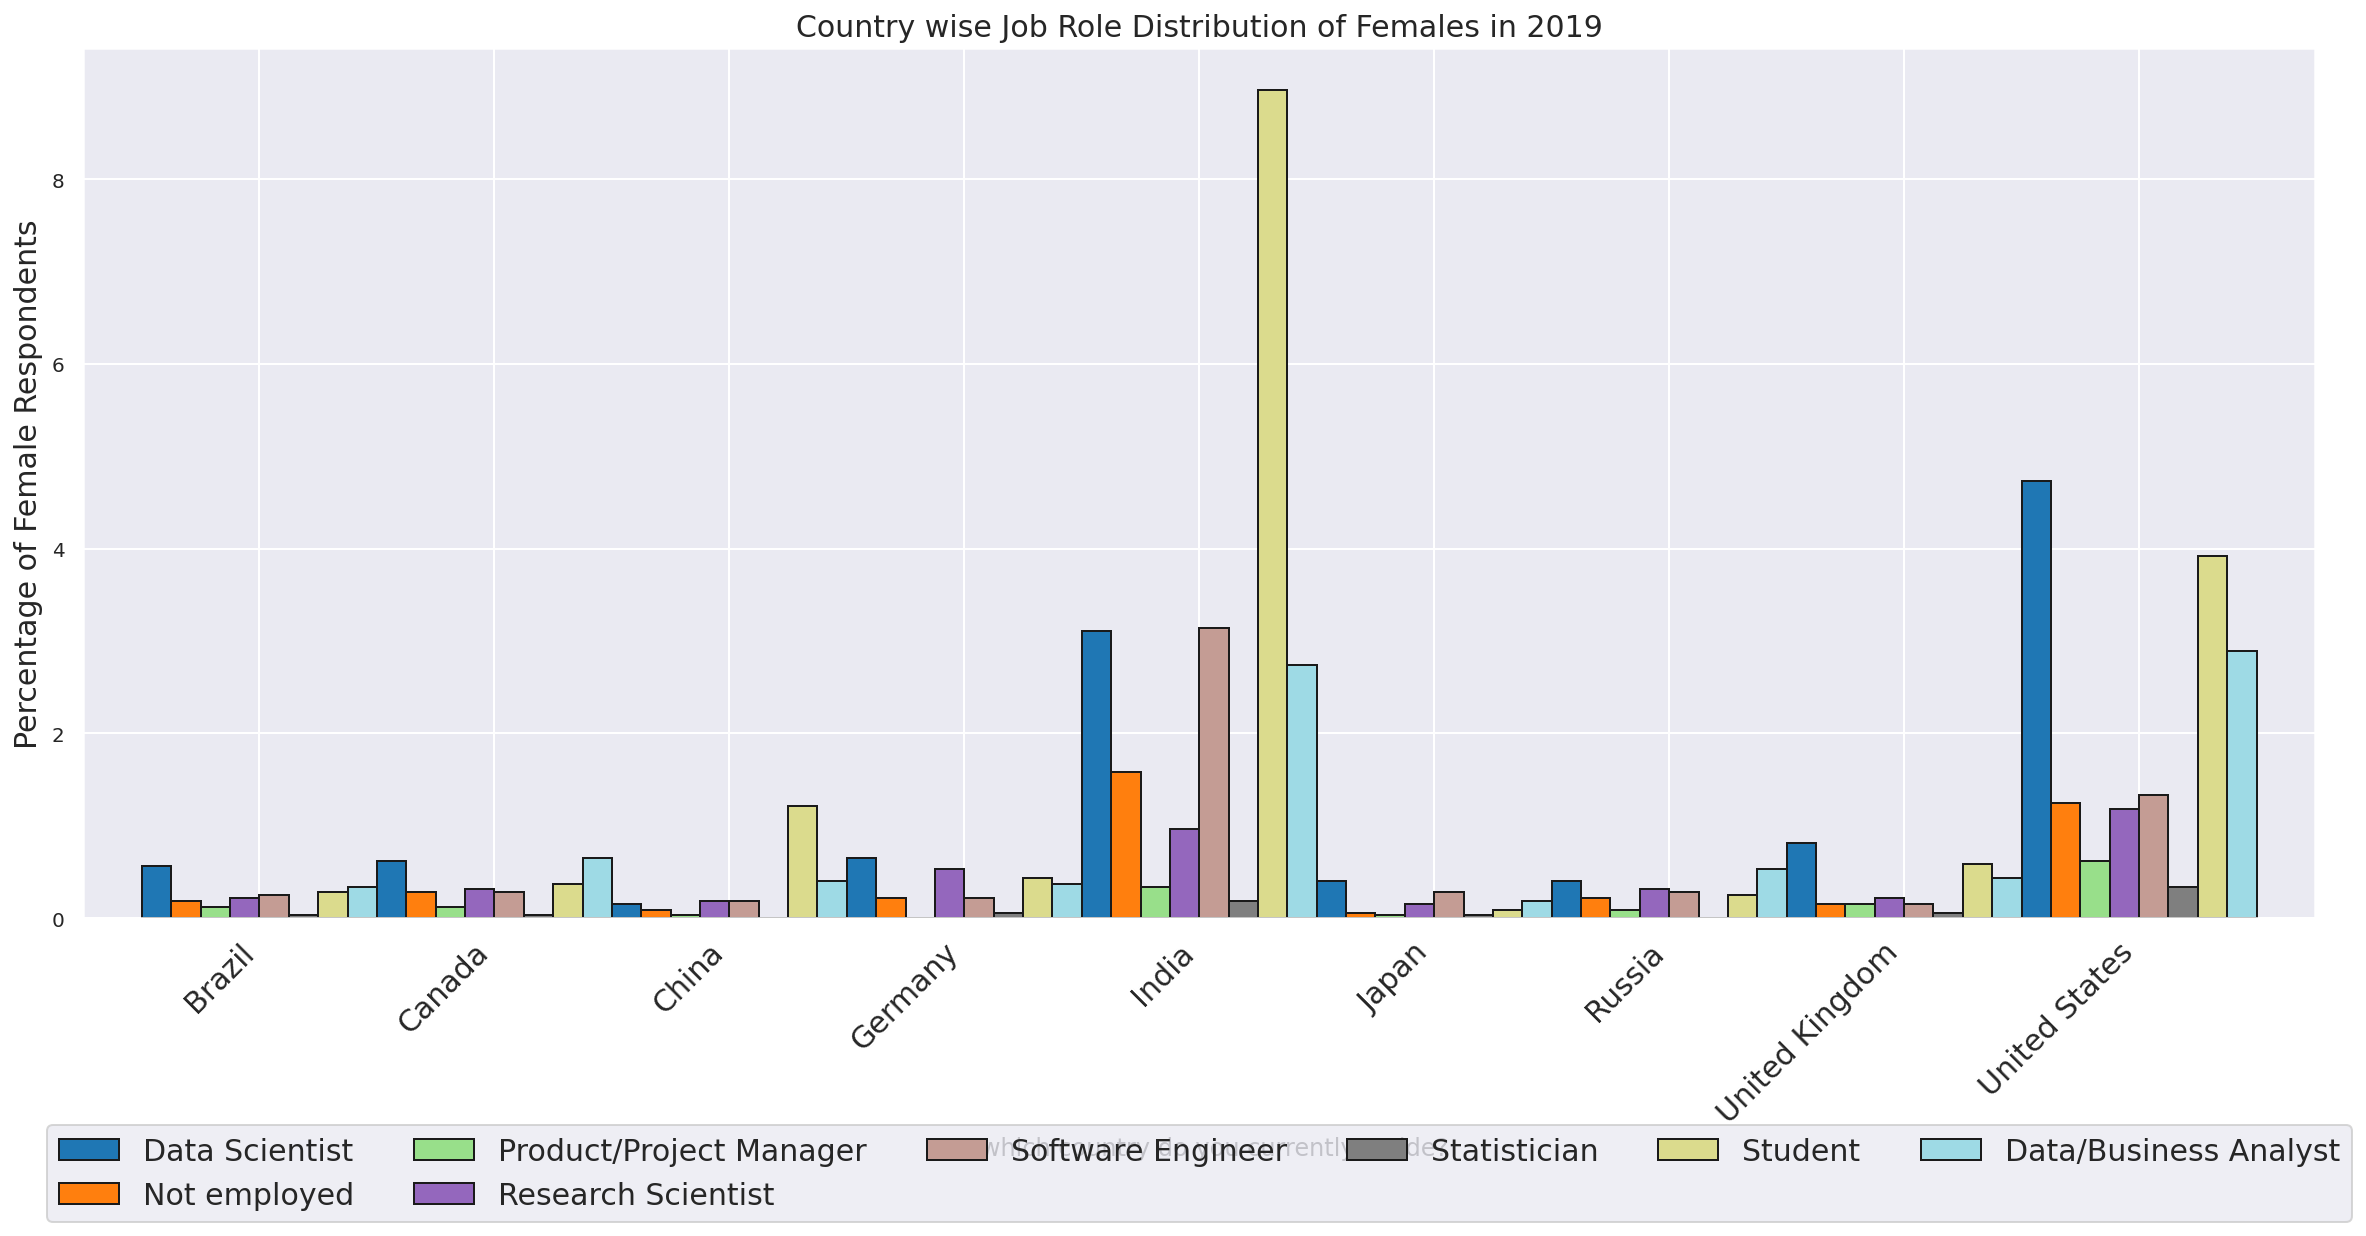

In [20]:

df_roles_temp = pd.crosstab(female_2019['In which country do you currently reside?'],
                            female_2019['Select the title most similar to your current role (or most recent title if retired): - Selected Choice'])
df_roles_temp['Data Engineer'] = df_roles_temp['DBA/Database Engineer']+df_roles_temp['Data Engineer']
df_roles_temp['Data/Business Analyst'] = df_roles_temp['Data Analyst']+df_roles_temp['Business Analyst']
df_roles = df_roles_temp[(df_edu_temp.index == 'Brazil')| (df_edu_temp.index == 'India') | (df_edu_temp.index == 'Japan') | (df_edu_temp.index == 'Russia') | (df_edu_temp.index == 'United States')
                    |(df_edu_temp.index == 'Canada')| (df_edu_temp.index == 'Germany') | (df_edu_temp.index == "China")
                    |(df_edu_temp.index == 'United Kingdom')].drop(['Other','DBA/Database Engineer','Data Engineer','Data Analyst','Business Analyst'],axis=1)


df_roles = (df_roles/len(female_2019))*100

ax = df_roles.plot(kind='bar',width=1,cmap='tab20',linewidth=1,edgecolor='k')
plt.gcf().set_size_inches(20,8)
plt.xticks( rotation=45,fontsize='10', horizontalalignment='right')
plt.yticks( fontsize=10)
plt.title('Country wise Job Role Distribution of Females in 2019', fontsize = 15)
#plt.xlabel('Countries',fontsize=15)
plt.ylabel('Percentage of Female Respondents',fontsize=15)
plt.xticks( rotation=45,fontsize='15', horizontalalignment='right')
plt.yticks( fontsize=10)
plt.legend(fontsize=15,bbox_to_anchor=(0.5, -0.22), loc="upper center",ncol=6)
plt.show()


> **📌 Points to note :**
* Again, leaving out the students, U.S has the maximum number of Data Scientists who took part in the survey, followed by India.
* The U.S also has the maximum number of Data Analysts participating in the survey, again followed by India.
* India has the number of Software Engineers participating in the survey.
* The percentage of unemployed females respondents(~<2%) is also high in India.

## <a>5.4 Percentage of Female Data Scientists over the years <a/>

In [21]:
def return_percentage1(data,question_part):
    """Calculates percent of each value in a given column"""
    total = data[question_part].count()
    counts_df= data[question_part].value_counts()
    percentage_df = (counts_df*100)/total
    return percentage_df



female_DS_2017 = return_percentage1(female_2017,'CurrentJobTitleSelect').loc['Data Scientist']
female_DS_2018 = return_percentage1(female_2018,'Select the title most similar to your current role (or most recent title if retired): - Selected Choice').loc['Data Scientist']
female_DS_2019 = return_percentage1(female_2019,'Select the title most similar to your current role (or most recent title if retired): - Selected Choice').loc['Data Scientist']

ds = pd.DataFrame(data = [female_DS_2017,female_DS_2018,female_DS_2019],
                          columns = ['Percentage of total roles'], index = ['2017','2018','2019'])
ds.round(1)
ds.index.names = ['Year of Survey']

x = ds['Percentage of total roles'].index
y = np.round(ds['Percentage of total roles'].values,1)


# Use textposition='auto' for direct text
fig = go.Figure(data=[go.Bar(
            x=['Year 2017','Year 2018','Year 2019'],
            y=y,
            text=y,
            width=0.4,
            textposition='auto',
            marker=dict(color='dodgerblue')
 )])

fig.data[0].marker.line.width = 1
fig.data[0].marker.line.color = "black"
fig.update_layout(yaxis=dict(title='Percentage of Female Respondents'),width=700,height=500,
                  title='Female Data Scientists in the survey',xaxis=dict(title='Years'))
fig.show()

**📌 Points to note :**
* Even though the percentage of female respondents has decreased in 2019, the percentage of Data Scientists who took the surveyin 2019 is greater than in 2018.

# <a>6. Salary</a>
![](https://cdn-images-1.medium.com/max/800/1*8qpREVGhO0noT07tqE0C2g.png)
*PC: www.freepik.com*
    
Even though some [researches](http://www.timothy-judge.com/Judge,%20Piccolo,%20Podsakoff,%20et%20al.%20(JVB%202010).pdf) say otherwise, salary is a big motivational factor in retaining and acquiring new talent. Let's see how well our ladies are paid in the Data Science space.

## <a>6.1 Salary Range of Female respondents in 2019</a>
We shall first analyze the general trend of the salary of the female respondents in 2019. For the responses, which were blank I have included them in the 'Didnot Disclose' category.

In [22]:
female_2019['What is your current yearly compensation (approximate $USD)?'].fillna('didnot Disclose',inplace=True)

salary_order = ['$0-999',
                        '1,000-1,999',
                        '2,000-2,999',
                        '3,000-3,999',
                        '4,000-4,999',
                        '5,000-7,499',
                        '7,500-9,999',
                        '10,000-14,999',
                        '15,000-19,999',
                        '20,000-24,999',
                        '25,000-29,999',
                        '30,000-39,999',
                        '40,000-49,999',
                        '50,000-59,999',
                        '60,000-69,999',
                        '70,000-79,999',
                        '80,000-89,999',
                        '90,000-99,999',
                        '100,000-124,999',
                        '125,000-149,999',
                        '150,000-199,999',
                        '200,000-249,999',
                        '250,000-299,999',
                        '300,000-500,000',
                        '> $500,000',
                        'didnot Disclose']

def plot_graph(data,question,title,x_axis_title,y_axis_title):
    df = return_percentage(data,question)
    
    trace1 = go.Bar(
                    x = df.index,
                    y = df[question],
                    #orientation='h',
                    marker = dict(color='dodgerblue',
                                 line=dict(color='black',width=1)),
                    text = df.index)
    data = [trace1]
    layout = go.Layout(barmode = "group",title=title,width=800, height=500,
                       xaxis=dict(type='category',categoryorder='array',categoryarray=salary_order,title=y_axis_title),
                       yaxis= dict(title=x_axis_title))
                       
    fig = go.Figure(data = data, layout = layout)
    iplot(fig)

plot_graph(female_2019,'What is your current yearly compensation (approximate $USD)?','Salary Range of Female respondents in 2019','Percentage of Female Respondents','Annual Salary in USD')
    

> **📌 Points to note :**
* The majority of female respondents did not wish to disclose their annual salary. Of the remaining, (~10%) have an annual salary of fewer than 1000 dollars. This makes sense since a major chunk of that population is students who may currently not be having permanent jobs. 
* The next common salary range is (1k–2k) dollars and (10k-15k) dollars. It appears that the salary range of females in 2019 is highly varied.
* There is also a tiny percentage of females who make more than 200k and 300k dollars a year.

## <a>6.2 Comparison of Salaries of Female respondents in 2018 and 2019</a>

Let's see if this pattern of salaries is exclusive to 2019 only or is it a recurring phenomenon. Let's compare it with the 2018 Salary range. For this, we shall do some preprocessing of the data so that we get a common salary range for both the years. 
*Note that I did not include the 2017 salary data since it had more than 10 different currencies.*

In [23]:

# Column of dataset under consideration
q = 'What is your current yearly compensation (approximate $USD)?'

#Preprocessing the 2019 salary data to get standard salary categories
female_2019['Salary Range'] = np.where(female_2019[q].isin(['$0-999','1,000-1,999','2,000-2,999','3,000-3,999',
                     '4,000-4,999','5,000-7,499','7,500-9,999']),'0-10,000',' ')
female_2019['Salary Range'] = np.where(female_2019[q].isin(['10,000-14,999','15,000-19,999',]),'10-20,000',female_2019['Salary Range'])
female_2019['Salary Range'] = np.where(female_2019[q].isin(['20,000-24,999','25,000-29,999',]),'20-30,000',female_2019['Salary Range'])
female_2019['Salary Range'] = np.where(female_2019[q].isin(['30,000-39,999']),'30-40,000',female_2019['Salary Range'])
female_2019['Salary Range'] = np.where(female_2019[q].isin(['40,000-49,999']),'40-50,000',female_2019['Salary Range'])
female_2019['Salary Range'] = np.where(female_2019[q].isin(['50,000-59,999']),'50-60,000',female_2019['Salary Range'])
female_2019['Salary Range'] = np.where(female_2019[q].isin(['60,000-69,999']),'60-70,000',female_2019['Salary Range'])
female_2019['Salary Range'] = np.where(female_2019[q].isin(['70,000-79,999']),'70-80,000',female_2019['Salary Range'])
female_2019['Salary Range'] = np.where(female_2019[q].isin(['80,000-89,999']),'80-90,000',female_2019['Salary Range'])
female_2019['Salary Range'] = np.where(female_2019[q].isin(['90,000-99,999']),'90-100,000',female_2019['Salary Range'])
female_2019['Salary Range'] = np.where(female_2019[q].isin(['100,000-124,999']),'100-125,000',female_2019['Salary Range'])
female_2019['Salary Range'] = np.where(female_2019[q].isin(['125,000-149,999']),'125-150,000',female_2019['Salary Range'])
female_2019['Salary Range'] = np.where(female_2019[q].isin(['150,000-199,999']),'150-200,000',female_2019['Salary Range'])
female_2019['Salary Range'] = np.where(female_2019[q].isin(['200,000-249,999']),'200-250,000',female_2019['Salary Range'])
female_2019['Salary Range'] = np.where(female_2019[q].isin(['250,000-299,999']),'250-300,000',female_2019['Salary Range'])
female_2019['Salary Range'] = np.where(female_2019[q].isin(['300,000-400,000']),'300-500,000',female_2019['Salary Range'])
female_2019['Salary Range'] = np.where(female_2019[q].isin(['400,000-500,000']),'300-500,000',female_2019['Salary Range'])
female_2019['Salary Range'] = np.where(female_2019[q].isin(['> $500,000']),'500,000+',female_2019['Salary Range'])
female_2019['What is your current yearly compensation (approximate $USD)?'].fillna('didnot Disclose',inplace=True)

#Preprocessing the 2018 salary data to get standard salary categories

female_2018[q].replace({'I do not wish to disclose my approximate yearly compensation':'didnot Disclose'},inplace=True)
female_2018[q].fillna('didnot Disclose',inplace=True)

salary_order2 = ['0-10,000',
                '10-20,000',
                '20-30,000',
                '30-40,000',
                '40-50,000',
                '50-60,000',
                '60-70,000',
                '70-80,000',
                '80-90,000',
                '90-100,000',
                '100-125,000',
                '125-150,000',
                '150-200,000',
                '200-250,000',
                '250-300,000',
                '300-400,000',
                '400-500,000',
                '500,000+',
                'didnot Disclose']

   
df1 = return_percentage(female_2019,'Salary Range')
df2 = return_percentage(female_2018,'What is your current yearly compensation (approximate $USD)?')

fig = go.Figure(data=[
    go.Bar(name='Females in 2019', y=df1['Salary Range'], x=df1.index,marker_color='dodgerblue'),
    go.Bar(name='Females in 2018', y=df2[q], x=df2.index,marker_color='skyblue')
])    
fig.update_layout(barmode='group',title='Female respondents salaries in 2018 and 2019',xaxis=dict(title='Annual Salary in USD',categoryarray=salary_order2),yaxis=dict(title='Percentage of Female respondents'))
fig.show()    

> **📌 Points to note :**
* The general pattern amongst the salary distribution appears to be the same in 2018 and 2019.
* The percentage of females earning less than 10k USD in 2019 is less as compared to last year. 
* For all the other salary ranges, annual compensation in 2019 is marginally better than it was in 2018, which is good.
* Another important point is that unlike in 2018, 2019 does have some females who earn more than 500k USD.

## <a>6.3 Comparison of Male and Female salaries in 2019.</a>
We saw things were slightly better in 2019 as compared to 2018. Let's now see compare the salaries genderwise.


In [24]:

male_2019['What is your current yearly compensation (approximate $USD)?'].fillna('didnot Disclose',inplace=True)

male_salary_2019 = return_percentage(male_2019,'What is your current yearly compensation (approximate $USD)?')
female_salary_2019 = return_percentage(female_2019,'What is your current yearly compensation (approximate $USD)?')
df_male_salary = male_salary_2019;df_female_salary = female_salary_2019

fig = go.Figure(data=[
    go.Bar(name='Males in 2019', y=df_male_salary['What is your current yearly compensation (approximate $USD)?'], x=df_male_salary.index,marker_color='dodgerblue'),
    go.Bar(name='Females in 2019',y=df_female_salary['What is your current yearly compensation (approximate $USD)?'], x=df_female_salary.index,marker_color='skyblue')
])    
fig.update_layout(barmode='group',title='Comparison of Male and Female salaries in 2019.',xaxis=dict(title='Annual Salary in USD',categoryarray=salary_order),yaxis=dict(title='Percentage of respondents'))
fig.show()    

> 📌 Points to note :
* The general salary trend remains the same for both genders.
* Most of the people earn less than 1000 USD. However, the percentage of women earning less than 1000 dollars is more for women than men.
* Also, unlike men, there are no women respondents earning greater than 500k USD.


## <a>6.4 Comparison of Male & Female Data Scientists' salaries in 2019<a/>
It'll be also interesting to see the salary distribution for people working as Data Scientists.
    

In [25]:
def return_percentage_groupbarplot(total_data,data,question_part):
    """Calculates percent of each value in a given column"""
    total = len(total_data)
    counts_df= data[question_part].value_counts()
    percentage_df = (counts_df*100)/total
    return percentage_df

DS_2019 = df_2019[df_2019['Select the title most similar to your current role (or most recent title if retired): - Selected Choice']=='Data Scientist']
female_2019['What is your current yearly compensation (approximate $USD)?'].fillna('didnot Disclose',inplace=True)
male_2019['What is your current yearly compensation (approximate $USD)?'].fillna('didnot Disclose',inplace=True)

female_DS_2019 = female_2019[female_2019['Select the title most similar to your current role (or most recent title if retired): - Selected Choice']=='Data Scientist'] 
male_DS_2019 = male_2019[male_2019['Select the title most similar to your current role (or most recent title if retired): - Selected Choice']=='Data Scientist']  

df_DS_male = return_percentage_groupbarplot(DS_2019,male_DS_2019,'What is your current yearly compensation (approximate $USD)?')
df_DS_female = return_percentage_groupbarplot(DS_2019,female_DS_2019,'What is your current yearly compensation (approximate $USD)?')

fig = go.Figure(data=[
    go.Bar(name='Male', y=df_DS_male.values, x=df_DS_male.index,marker_color='dodgerblue'),
    go.Bar(name='Females', y=df_DS_female.values, x=df_DS_female.index,marker_color='skyblue')
])    
fig.update_layout(barmode='group',title="Salaries of Male & Female Data Scientists'in 2019",xaxis=dict(title='Annual Salary in USD',categoryarray=salary_order),yaxis=dict(title='Percentage of total Data Scientists'))
fig.show() 

> **📌 Points to note :**
* Again, the general pattern remains the same. The percentage of women Data Scientists earning less than 1000 USD is considerably higher as compared to their male counterparts.
* Female data scientists also seem to pay less in the high salary range. The percentage of women Data Scientists earning more than 200k USD is almost minimal.



## <a>6.5 A look at Salaries of Female Data Scientists worldwide</a>

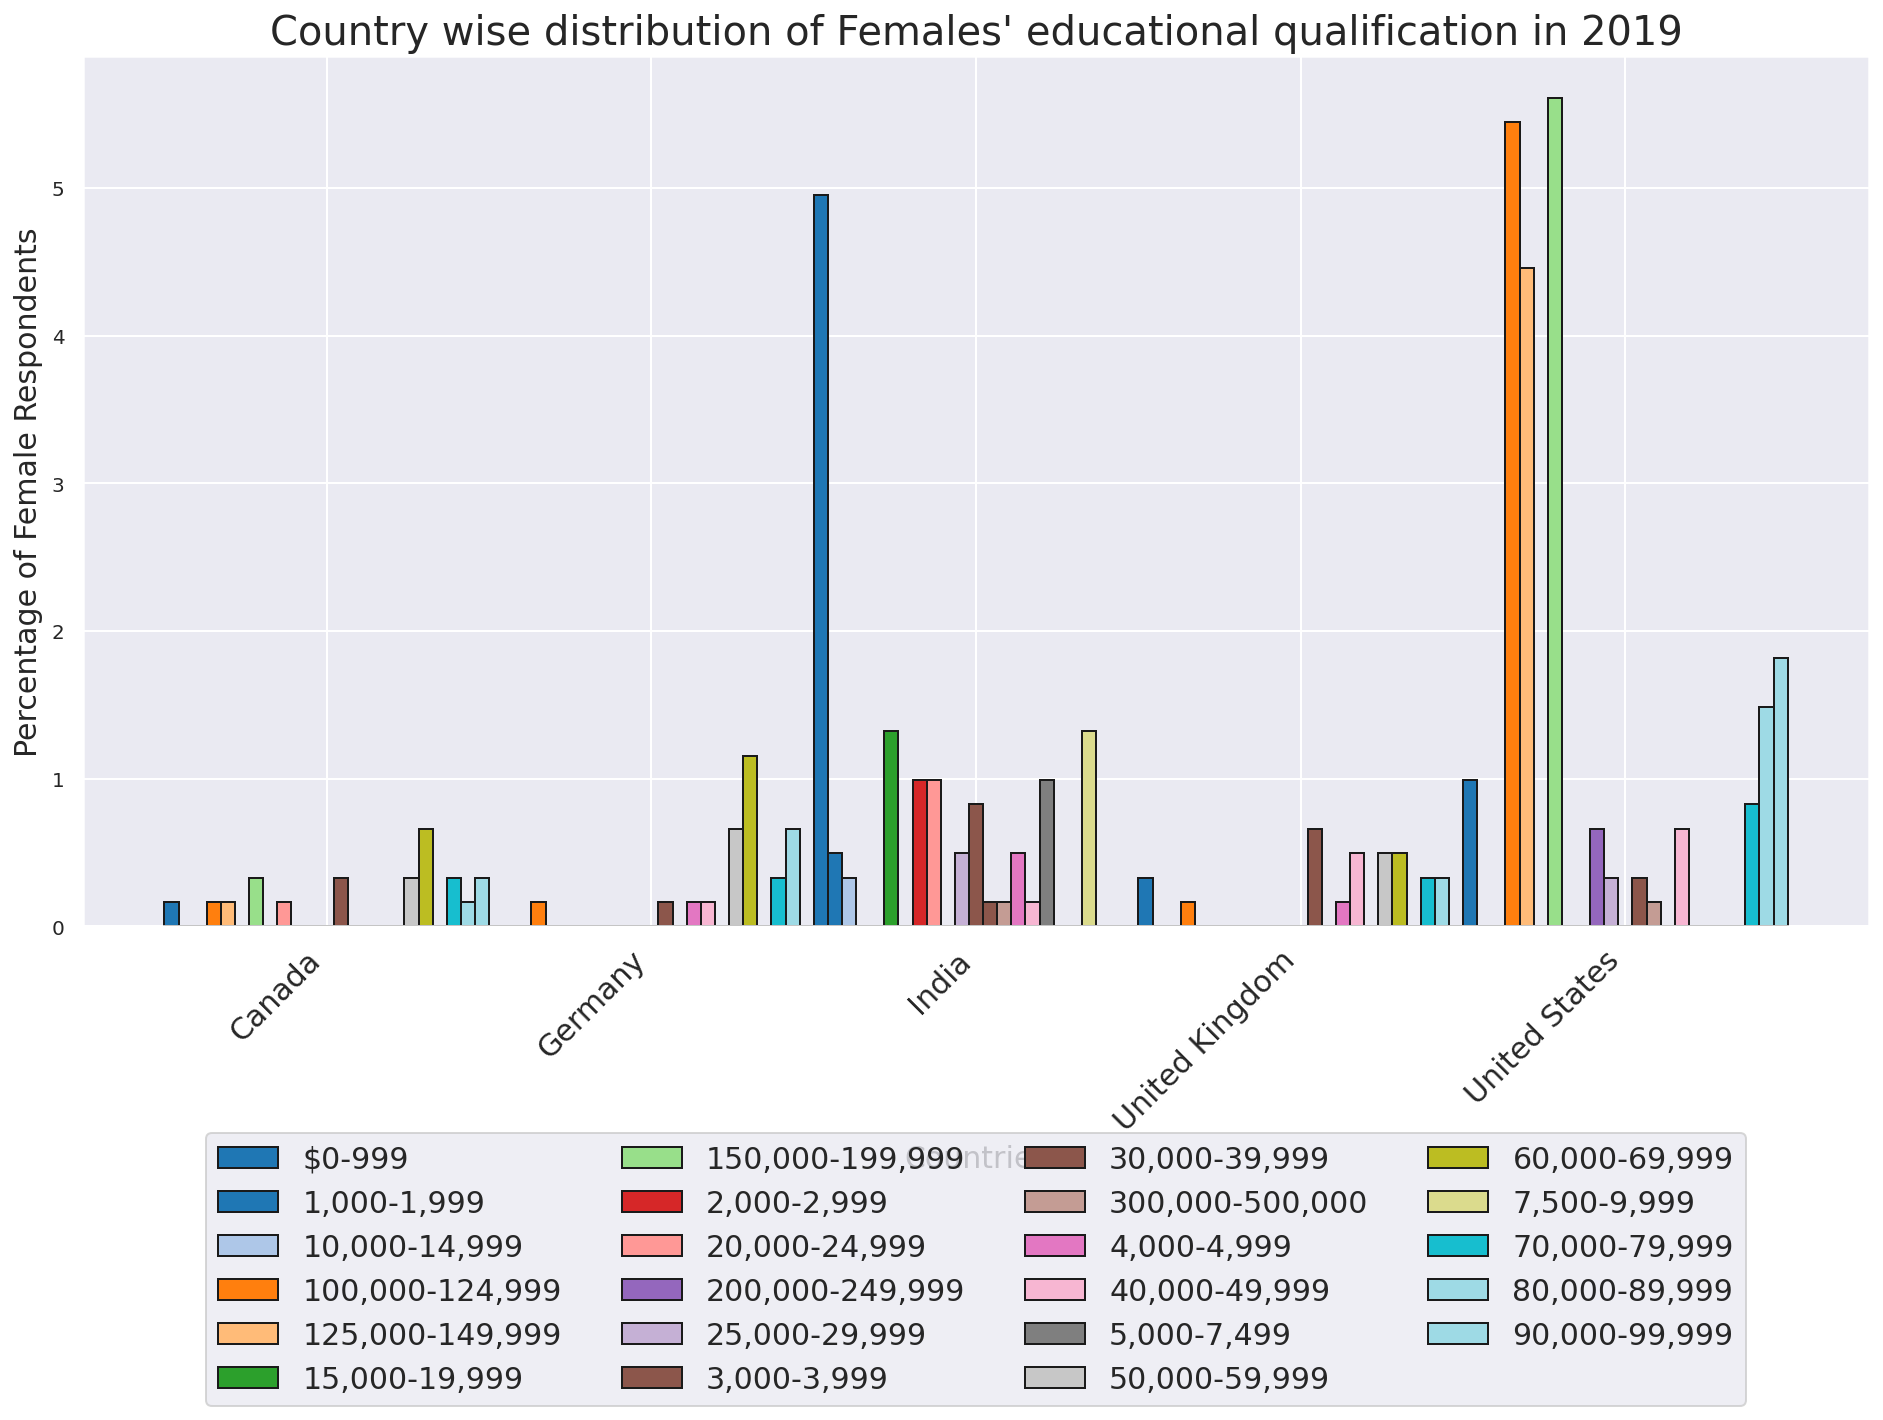

In [26]:
df_salary_temp = pd.crosstab(female_DS_2019['In which country do you currently reside?'],female_DS_2019['What is your current yearly compensation (approximate $USD)?'])
df_salary = df_salary_temp[(df_salary_temp.index == 'India')| (df_salary_temp.index == 'United States')
                           |(df_salary_temp.index == 'Canada') | (df_salary_temp.index == 'Germany') |
                           (df_salary_temp.index == 'United Kingdom')].drop('didnot Disclose',axis=1)

df_salary = df_salary/len(female_DS_2019)*100
df_salary.plot(kind='bar',width=1,cmap='tab20',linewidth=1,edgecolor='k')
plt.gcf().set_size_inches(16,8)
plt.title("Country wise distribution of Females' educational qualification in 2019", fontsize = 20)
plt.xlabel('Countries',fontsize=15)
plt.ylabel('Percentage of Female Respondents',fontsize=15)
plt.xticks( rotation=45,fontsize='15', horizontalalignment='right')
plt.yticks( fontsize=10)
plt.legend(fontsize=15,bbox_to_anchor=(0.5, -0.22), loc="upper center",ncol=4)
plt.show()

> **📌 Points to note :**
* There are definitely salary differences between the U.S and other countries. Data Scientists in U.S are paid relatively higher than in other countries.
* The majority of Female Data Scientists in the U.S earn between 100–200k USD, while a lot of Data Scientists in India earn less than 1000 dollars a year. Indian Data Scientists are highly underpaid as compared to other countries.
* The proportion of Data Scientists earning more than 100k annually is also higher than in her countries.

# <a>Key Takeaways and Recommendations</a>

Some of the significant takeaways from this entire exercise can be summed up in six key points:

* The participation of women in this survey is very low and hasn't shown much improvement over the years. We need to see the reason behind such low participation and how we can encourage women to become more participative. Networking can be a great way for women to connect with other fellow women and help and encourage others. A lot of support groups are present which help to create a friendly and supportive environment for Women in Data Science where they can share knowledge, develop skills and also help others in finding jobs and advance their careers. Some of these groups are:
>
    * [Women Who Code](https://www.womenwhocode.com/)
    * [Women in Machine Learning & Data Science](http://wimlds.org/)
    * [Women in Tech Summit](https://womenintechsummit.net/)
    * [Black Women in Computing](http://blackwomenincomputing.org/)
    * [Rladies Global](https://rladies.org/)
    * [PyLadies](https://www.pyladies.com/)
    * [EdTechWomen](http://edtechwomen.com/chapters-and-events)
    * [Widening Natural Language Processing](http://www.winlp.org/mission/)
    * [Women in Big Data](https://www.womeninbigdata.org/)
    

* The response from the U.S and Indian women is really heartening, although it is still very low as compared to their male counterparts. Africa shows a glimmer of hope with countries like Nigeria and Algeria gearing up. Organizations should team up with the African government and NGOs to provide better opportunities for study and research to these women.
* The young female populations in Data Science are on the rise with the majority coming from India. This is not surprising as India has one of the highest young brigades in the world. This demographic dividend should be tapped efficiently by reforming the existing Indian education model and introducing high-quality Data science courses in their existing curriculum.
* The females in the  Science space are highly qualified with the majority having a Master's degree. 
* Most of the female Data Scientists are located in the U.S and India. Some women who are not employed have also responded to the survey. There could be multiple reasons for that. They could be students or women who wish to restart their careers after a break. The latter could be provided with assistance by getting them to attend meetups or community events. For the students, a mentorship is a good option.
* The salary distribution has remained constant over the years but Indian female Data Scientists are paid comparatively less as compared to their counterparts in the U.S.



# <a>Conclusion</a>

So let's get back to the initial question - Are the Geek Girls Rising? It's a mixed feeling. Some areas have shown improvement while a lot of work is required in others. Overall, things appear to be promising and if we could work towards it, future will be better than it is today.
Data science in itself is a combination of diverse scientific disciplines. It makes all the more sense to bring in people from different genders, backgrounds, and ethnicity. This way we can bring in more creativity and allow knowledge, discoveries, and innovation to flourish. 
It will require a collaborative effort from society to make diversity and inclusion a vital part of the ecosystem. As women, we should also make sure that we create a strong support group among ourselves to assist our fellow females in the Data Science and STEM space. Afterall **Empowered women, empower women**.